# Demographics Exploration

In [1]:
from utils.plots import *
from utils.constants import *
from utils.dataset import *

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.io as pio

PATH_PLOTS_EXPLORATION = PATH_PLOTS / "exploration"
PATH_PLOTS_EXPLORATION.mkdir(parents=True, exist_ok=True)

PATH_PLOTS_DEMOGRAPHICS = PATH_PLOTS_EXPLORATION / "demographics"
PATH_PLOTS_DEMOGRAPHICS.mkdir(parents=True, exist_ok=True)

In [2]:
demographic_data = pd.read_csv(PATH_DATASET / "demographic_data.csv", index_col=0)
demographic_data

Participant ID  Age  Gender Employment
0             P01   22    Male    Student
1             P02   30  Female        PhD
2             P03   25    Male        PhD
3             P04   26    Male    Student
4             P05   23    Male    Student
5             P06   26  Female    Student
6             P07   30    Male    Student
7             P08   24    Male    Student
8             P09   25    Male    Student
9             P10   19  Female    Student
10            P11   26    Male    Student
11            P12   31    Male        PhD
12            P13   33    Male        PhD
13            P14   22  Female    Student
14            P15   24  Female    Student
15            P16   25    Male    Student
16            P17   31    Male    Student
17            P18   22  Female    Student
18            P19   25  Female        PhD
19            P20   31    Male     Worker
20            P21   30  Female        PhD
21            P22   36    Male    Student
22            P23   35  Female    Student
23            P24   20    Male    Student
24            P25   29    Male     Worker
25            P26   23    Male     Worker
26            P27   63    Male     Worker
27            P28   57  Female     Worker
28            P29   29    Male     Worker
29            P30   34  Female     Worker

## Gender

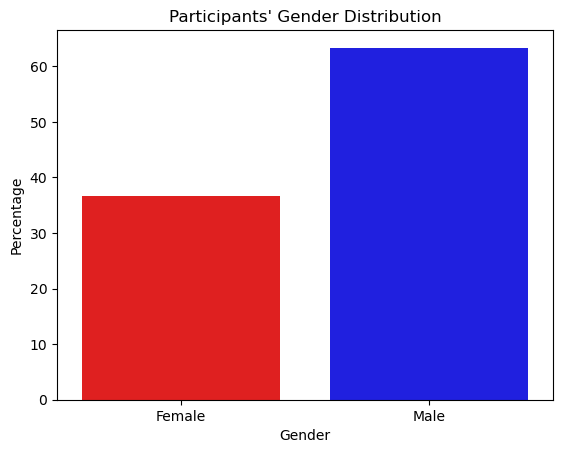

In [3]:
participants_by_gender = demographic_data.groupby("Gender").count()
participants_total = len(demographic_data)

proportion_gender = (participants_by_gender / participants_total)*100

ax = sns.barplot(proportion_gender, x="Gender", y="Participant ID", legend=False, hue=["Female", "Male"], hue_order=["Female", "Male"], palette=["red", "blue"])
ax.set(xlabel="Gender", ylabel="Percentage", title="Participants' Gender Distribution");
fig = ax.get_figure()
fig.savefig(PATH_PLOTS_DEMOGRAPHICS / "gender_distribution.png", bbox_inches="tight", dpi=600)
fig.savefig(PATH_PLOTS_DEMOGRAPHICS / "transparent_gender_distribution.png", bbox_inches="tight", dpi=600, transparent=True)

## Employment

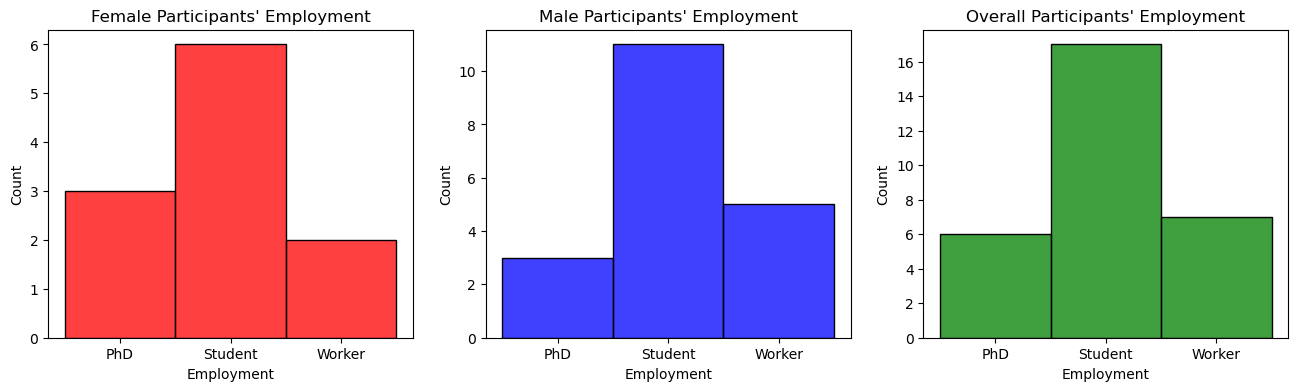

In [4]:
fig, ax = plt.subplots(1,3, figsize=(16,4))

employment_order = ["PhD", "Student", "Worker"]

sns.histplot(demographic_data[(demographic_data["Gender"] == "Female")].Employment.sort_values(), 
             bins=int(10), color = "red", 
             ax=ax[0])

sns.histplot(demographic_data[(demographic_data["Gender"] == "Male")].Employment.sort_values(), 
             bins=int(10), color = "blue", 
             ax=ax[1])

sns.histplot(demographic_data.Employment.sort_values(),  
             bins=int(10), color = "green", 
             ax=ax[2])

ax[0].set_title("Female Participants' Employment")
ax[1].set_title("Male Participants' Employment")
ax[2].set_title("Overall Participants' Employment")

fig.savefig(PATH_PLOTS_DEMOGRAPHICS / "employment_per_gender.png", bbox_inches="tight", dpi=600)
fig.savefig(PATH_PLOTS_DEMOGRAPHICS / "transparent_employment_per_gender.png", bbox_inches="tight", dpi=600, transparent=True)
fig.show()

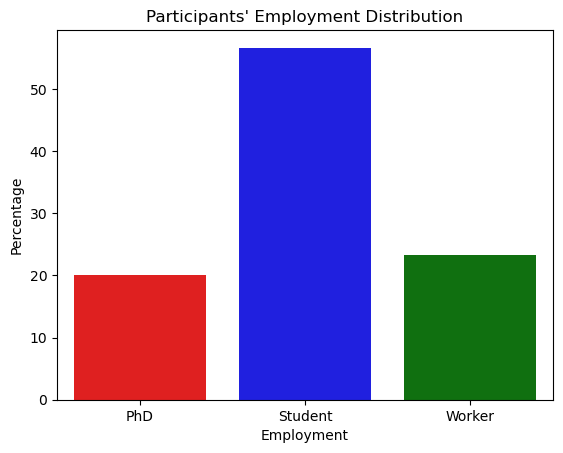

In [5]:
participants_by_employment = demographic_data.groupby("Employment").count()
participants_total = len(demographic_data)

proportion_employment = (participants_by_employment / participants_total)*100

ax = sns.barplot(proportion_employment, x="Employment", y="Participant ID", legend=False, hue=employment_order, hue_order=employment_order, palette=["red", "blue", "green"])
ax.set(xlabel="Employment", ylabel="Percentage", title="Participants' Employment Distribution");
fig = ax.get_figure()
fig.savefig(PATH_PLOTS_DEMOGRAPHICS / "employment_distribution.png", bbox_inches="tight", dpi=600)
fig.savefig(PATH_PLOTS_DEMOGRAPHICS / "transparent_employment_distribution.png", bbox_inches="tight", dpi=600, transparent=True)

## Age

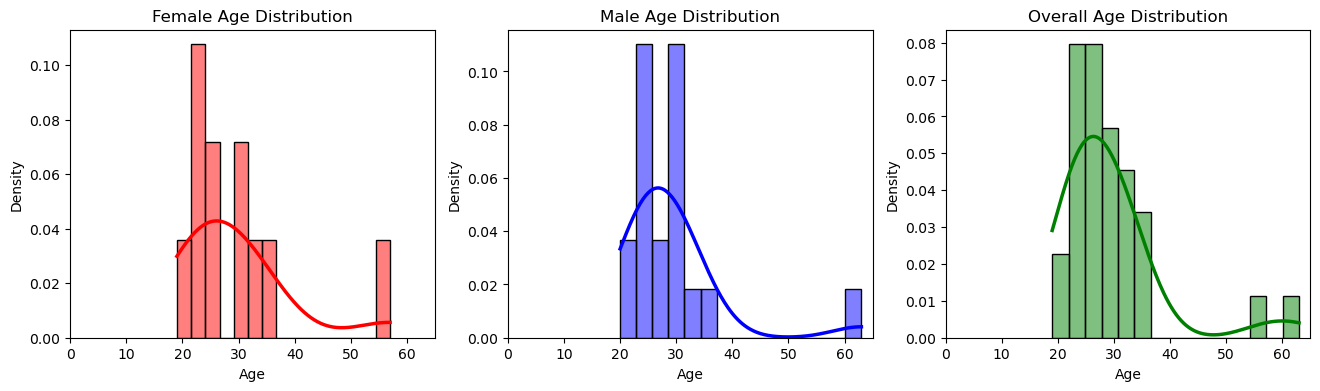

In [6]:
fig, ax = plt.subplots(1,3, figsize=(16,4))

sns.histplot(demographic_data[(demographic_data["Gender"] == "Female")].Age, bins=int(15), color = "red", stat="density", kde=True, line_kws={'linewidth': 2.5}, ax=ax[0])
sns.histplot(demographic_data[(demographic_data["Gender"] == "Male")].Age, bins=int(15), color = "blue", stat="density", kde=True, line_kws={'linewidth': 2.5}, ax=ax[1])
sns.histplot(demographic_data.Age, bins=int(15), color = "green", stat="density", kde=True, line_kws={'linewidth': 2.5}, ax=ax[2])

ax[0].set_xlim(0, 65)
ax[0].set_title("Female Age Distribution")
ax[1].set_xlim(0, 65)
ax[1].set_title("Male Age Distribution")
ax[2].set_xlim(0, 65)
ax[2].set_title("Overall Age Distribution")

fig.savefig(PATH_PLOTS_DEMOGRAPHICS/"age_distribution_per_gender.png", bbox_inches="tight", dpi=600)
fig.savefig(PATH_PLOTS_DEMOGRAPHICS / "transparent_age_distribution_per_gender.png", bbox_inches="tight", dpi=600, transparent=True)
fig.show()

# Signals Exploration

In [7]:
PATH_PLOTS_SIGNALS = PATH_PLOTS_EXPLORATION / "signals"
PATH_PLOTS_SIGNALS.mkdir(parents=True, exist_ok=True)

participants = demographic_data["Participant ID"].values
participants

array(['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18',
       'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P29', 'P30'], dtype=object)

## Example participant and activity

In [8]:
participant = participants[11]
activity = ACTIVITIES[6]

In [9]:
df = pd.read_csv(PATH_DATA_RAW / participant / (activity + ".csv"), index_col=0).iloc[:, :-1]
df.Label = df.Label.astype("int32")
df.Timestamp = df.Timestamp.apply(lambda x: pd.Timestamp(x, unit="s"))
df.head(5)

Timestamp          Ax           Ay           Az  \
85759 2022-08-11 12:32:38.000000000 9.463082062 -4.084508032 -0.004889568   
85760 2022-08-11 12:32:38.012000084 9.591171851 -3.618835809 -0.004332111   
85761 2022-08-11 12:32:38.023999929 9.306261853 -3.554192365 -0.004254727   
85762 2022-08-11 12:32:38.036000013 9.388861810 -4.049792108 -0.004848009   
85763 2022-08-11 12:32:38.048000097 8.811859210 -3.792415430 -0.004539904   

                Gx           Gy           Gz  Label Activity  
85759  0.595419847 36.213740458 14.564885496      5  Walking  
85760 -4.198473282 40.702290076 20.229007634      5  Walking  
85761 -2.091603053 47.145038168 17.832061069      5  Walking  
85762 -2.931297710 45.083969466 21.435114504      5  Walking  
85763 -3.557251908 45.893129771 20.625954198      5  Walking

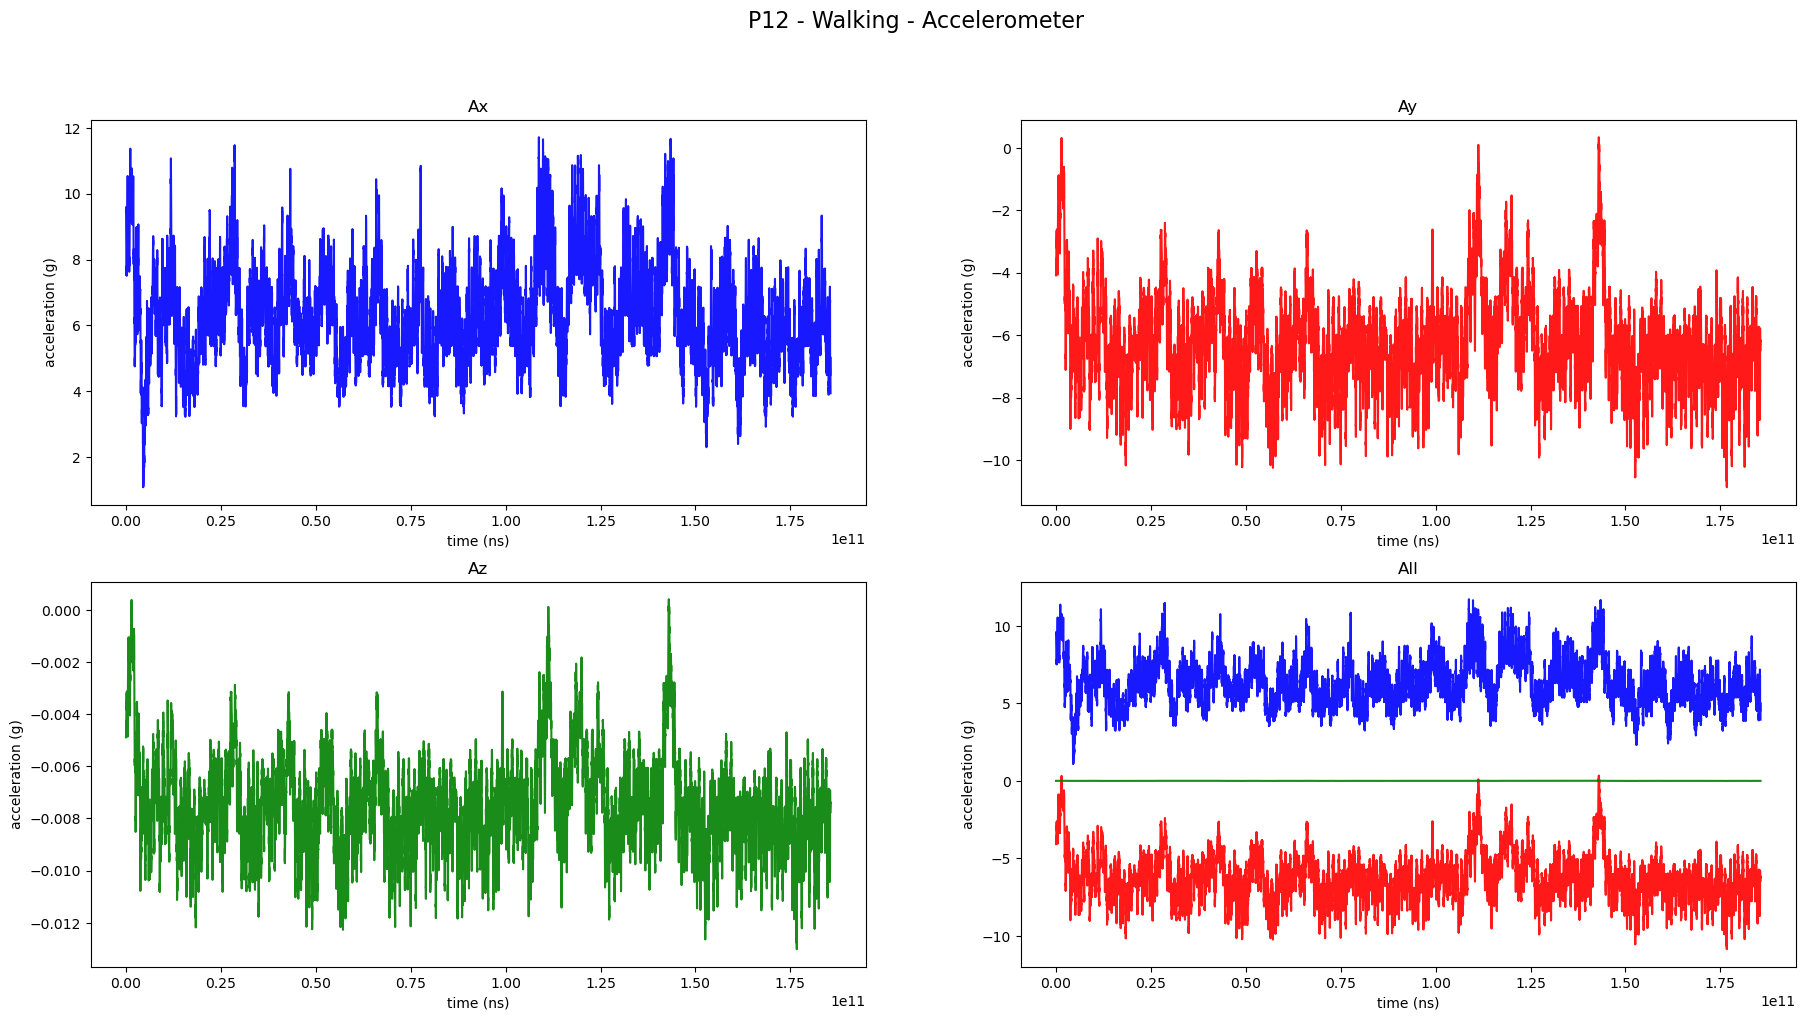

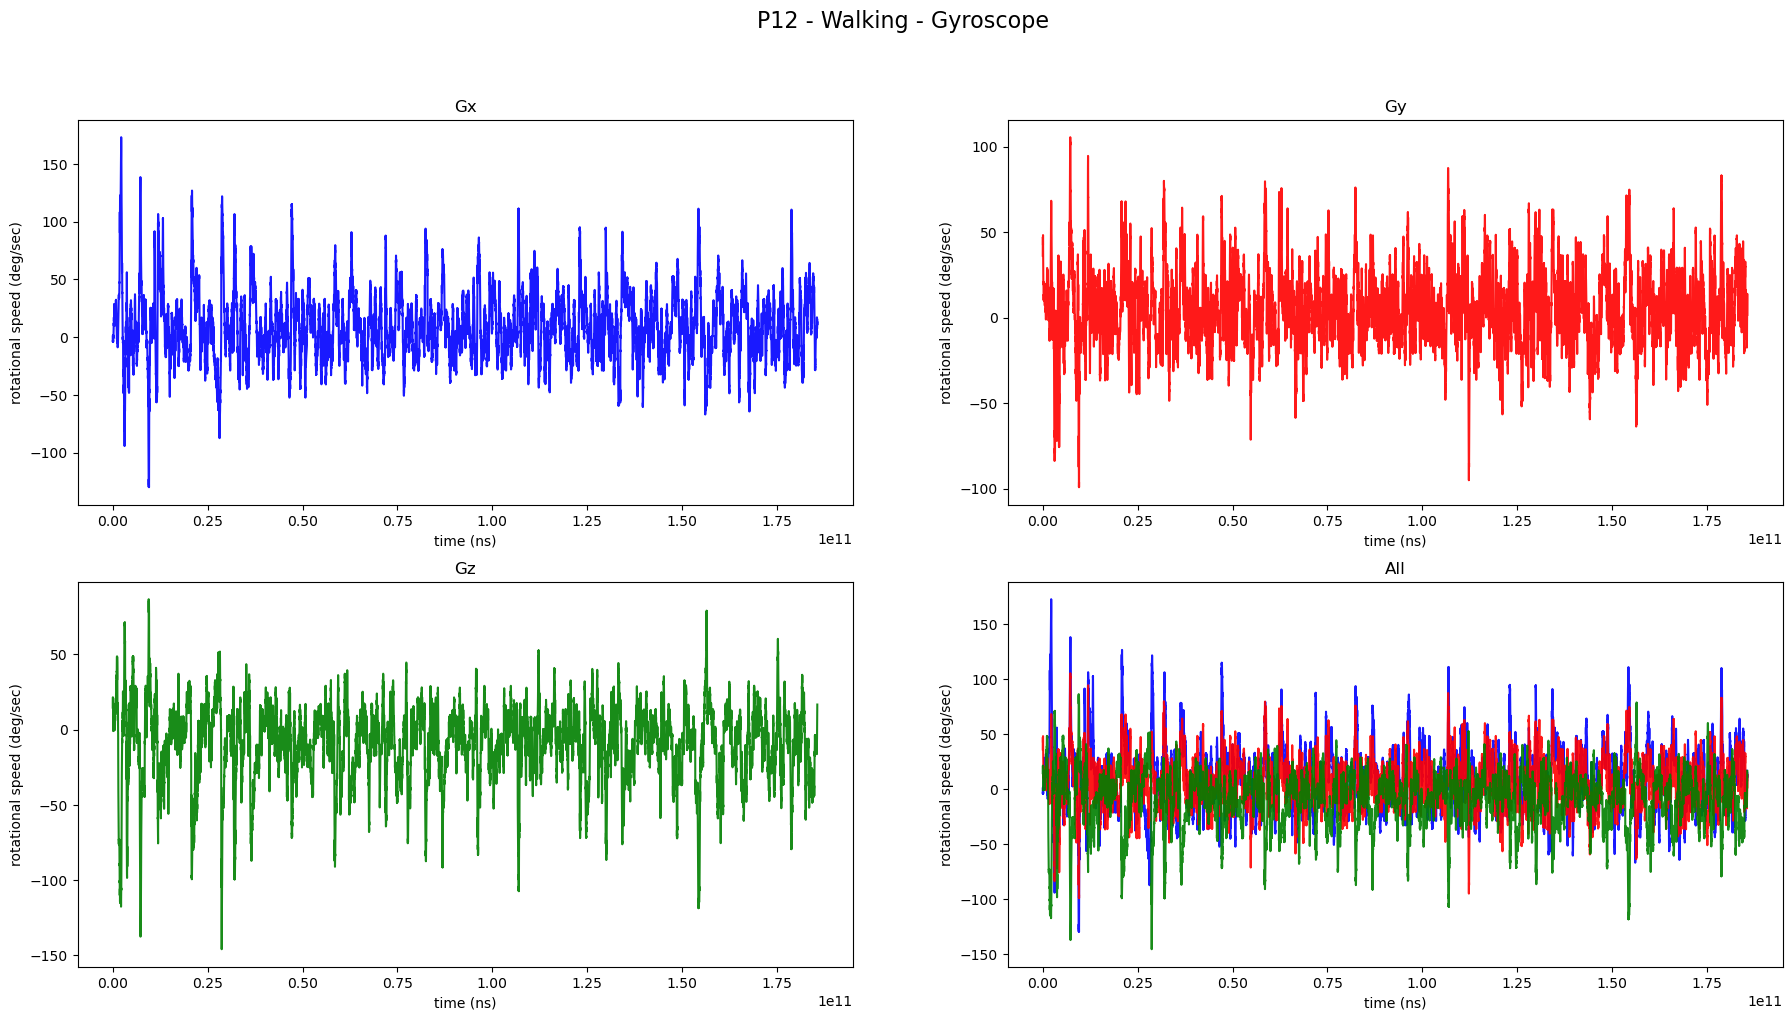

In [10]:
for sensor in ["accelerometer", "gyroscope"]:
    plot_title = " - ".join([participant, activity])
    
    eval("plot_%s"% sensor)(df, df.Timestamp, title=plot_title, output_path = PATH_PLOTS_SIGNALS / ("signal_example_" + sensor + ".png"))

## Get data

In [11]:
df_total = get_dataset(relative_timestamps=True)
df_total.drop(columns="Label", inplace=True)
df_total.shape

(3306483, 9)

## Recordings' Length

In [12]:
df_duration = df_total.groupby(["Participant", "Activity"])["Timestamp"].max().reset_index()

### Recording's Length Distribution per Activity

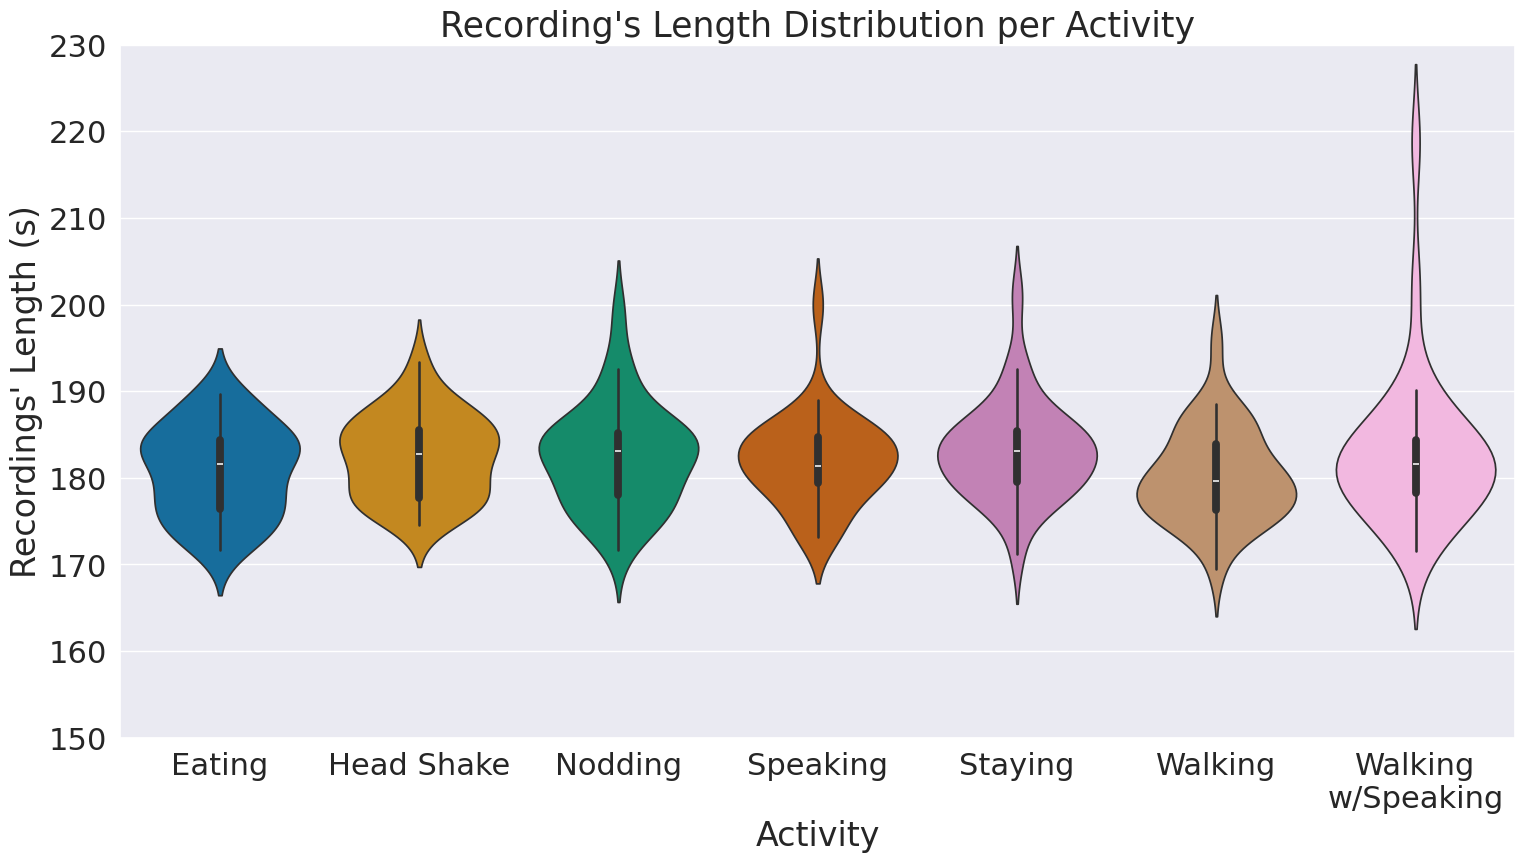

In [13]:
sns.set(font_scale=2)

fig, ax = plt.subplots( figsize=(18,9))

sns.set_theme(style="whitegrid")
sns.violinplot(data=df_duration, x="Activity", y="Timestamp", hue="Activity", palette=sns.color_palette("colorblind", len(ACTIVITIES)), ax=ax).set_title("Recording's Length Distribution per Activity",fontsize=25)

ax.set_ylim(150,230)
ax.set_ylabel("Recordings' Length (s)")

fig.savefig(PATH_PLOTS_SIGNALS / "distr_recordings_length_activity.png", bbox_inches="tight", dpi=600)
fig.savefig(PATH_PLOTS_SIGNALS / "transparent_distr_recordings_length_activity.png", bbox_inches="tight", dpi=600, transparent=True)
fig.show()

In [14]:
fig = px.violin(df_duration, y="Timestamp", x="Activity", color="Activity", box=True)

fig.update_layout(
    title_text="Recording's Length Distribution per Activity",
    title_font_size=16,
    yaxis=dict(title="Recordings' Length (s)", range=[150,230]),
    xaxis=dict(title="Activity"),
    template="simple_white",    
    font=dict(size=13)
)

fig.show()

fig.update_layout(showlegend=False)

fig.write_image(PATH_PLOTS_SIGNALS / "distr_recordings_length_activity_plotly.png", scale=3)
fig.update_layout(
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)",
)
image_bytes = pio.to_image(fig, format='png', engine='kaleido', scale=3)
with open(PATH_PLOTS_SIGNALS / "transparent_distr_recordings_length_activity_plotly.png", 'wb') as f:
    f.write(image_bytes)

### Average Recording Length per Participant

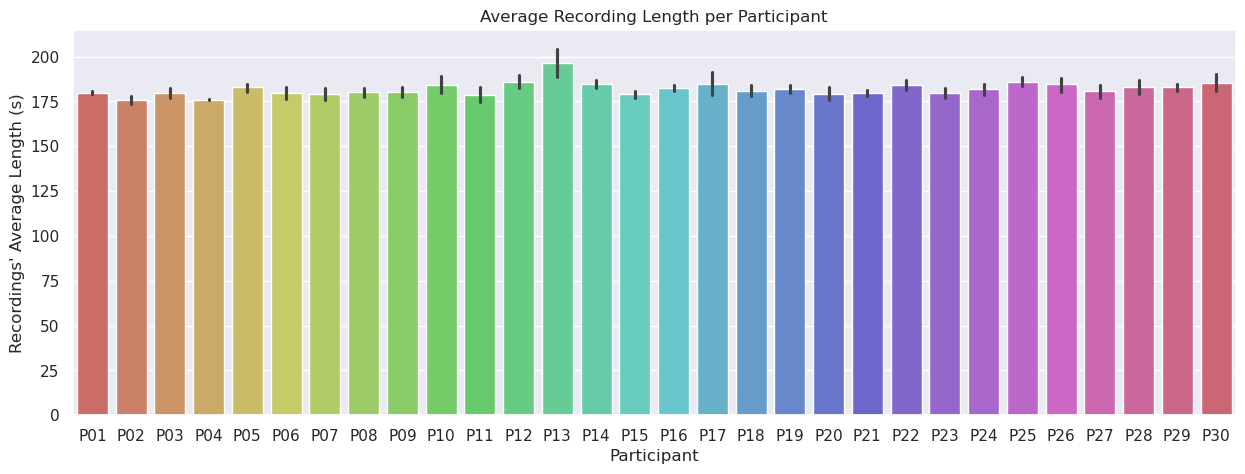

In [15]:
df_duration.Timestamp = df_duration.Timestamp.astype("float")

sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(15,5))

sns.set_theme(style="whitegrid")
sns.barplot(data=df_duration[["Participant", "Timestamp"]], x="Participant", y="Timestamp", hue="Participant", palette=sns.color_palette("hls", len(participants)), ax=ax).set_title("Average Recording Length per Participant")

ax.set_ylabel("Recordings' Average Length (s)")

fig.savefig(PATH_PLOTS_SIGNALS / "recordings_length_participants.png", bbox_inches="tight", dpi=600)
fig.savefig(PATH_PLOTS_SIGNALS / "transparent_recordings_length_participants.png", bbox_inches="tight", dpi=600, transparent=True)
fig.show()

In [16]:
df_duration_per_participant = df_duration.groupby(["Participant"])["Timestamp"].describe().reset_index()

fig = px.bar(df_duration_per_participant, x="Participant", y="mean", color="Participant", error_y="std")

fig.update_layout(
    title_text="Average Recording Length per Participant",
    title_font_size=16,
    yaxis=dict(title="Recordings' Average Length (s)"),
    xaxis=dict(title="Participant"),
    template="simple_white",
    font=dict(size=13)
)

fig.show()
fig.update_layout(showlegend=False)

fig.write_image(PATH_PLOTS_SIGNALS / "recordings_length_participants_plotly.png", scale=3) 

fig.update_layout(
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)",
)
image_bytes = pio.to_image(fig, format='png', engine='kaleido', scale=3)
with open(PATH_PLOTS_SIGNALS / "transparent_recordings_length_participants_plotly.png", 'wb') as f:
    f.write(image_bytes)

## Recordings' Frequency

In [17]:
df_frequency = pd.DataFrame(df_total.groupby(["Participant", "Activity"])["Timestamp"].count()) / df_duration.set_index(["Participant", "Activity"])
df_frequency.reset_index(inplace=True)

### Frequency Distribution per Activity

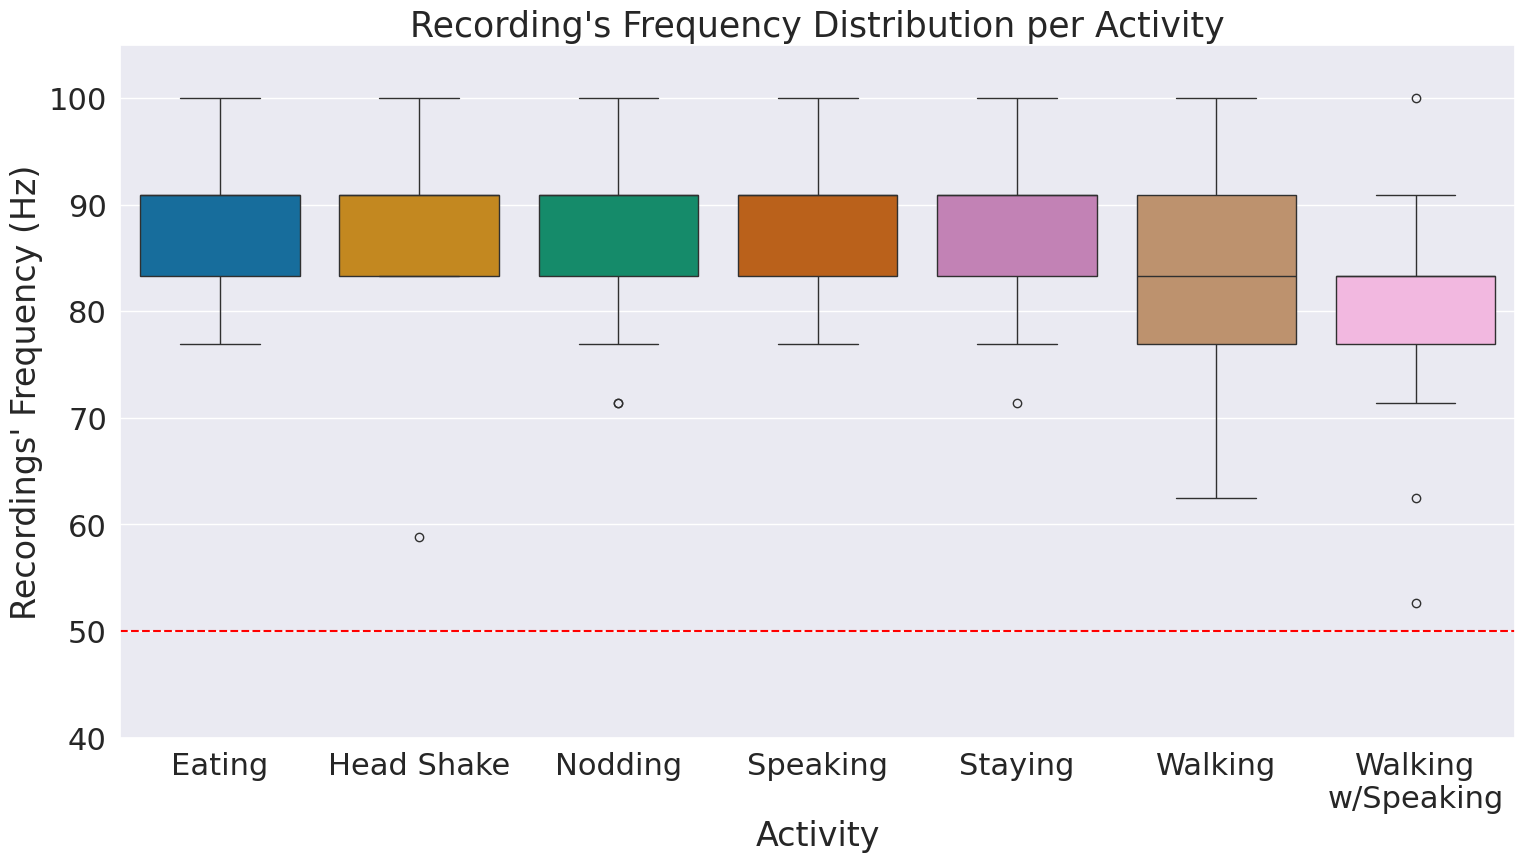

In [18]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(18,9))
ax.set_ylim(40, 105)

sns.set_theme(style="whitegrid")
sns.boxplot(data=df_frequency, x="Activity", y="Timestamp", hue="Activity", palette=sns.color_palette("colorblind", len(ACTIVITIES)), ax=ax).set_title("Recording's Frequency Distribution per Activity",fontsize=25)

ax.set_ylabel("Recordings' Frequency (Hz)")
ax.axhline(50, ls='--', c='red')

fig.savefig(PATH_PLOTS_SIGNALS / "distr_recordings_freq_activity.png", bbox_inches="tight", dpi=600)
fig.savefig(PATH_PLOTS_SIGNALS / "transparent_distr_recordings_freq_activity.png", bbox_inches="tight", dpi=600, transparent=True)
fig.show()

In [19]:
fig = px.box(df_frequency, y="Timestamp", x="Activity", color="Activity")

fig.update_layout(
    title_text="Recording's Frequency Distribution per Activity",
    title_font_size=16,
    yaxis=dict(title="Recordings' Frequency (Hz)", range=[40, 105]),
    xaxis=dict(title="Activity"),
    shapes=[dict(type= 'line', yref= 'y', y0= 50, y1= 50, xref='paper', x0=0, x1=1,
                 line=dict(color="rgba(255,0,0,1)", width=2, dash="dash")
                )],    
    template="simple_white",
    font=dict(size=13)
)

fig.show()
fig.update_layout(showlegend=False)

fig.write_image(PATH_PLOTS_SIGNALS / "distr_recordings_freq_activity_plotly.png", scale=3) 

fig.update_layout(
    paper_bgcolor="rgba(0, 0, 0, 0)",
    plot_bgcolor="rgba(0, 0, 0, 0)",
)
image_bytes = pio.to_image(fig, format='png', engine='kaleido', scale=3)
with open(PATH_PLOTS_SIGNALS / "transparent_distr_recordings_freq_activity_plotly.png", 'wb') as f:
    f.write(image_bytes)

### Average Recording Frequency per Participant

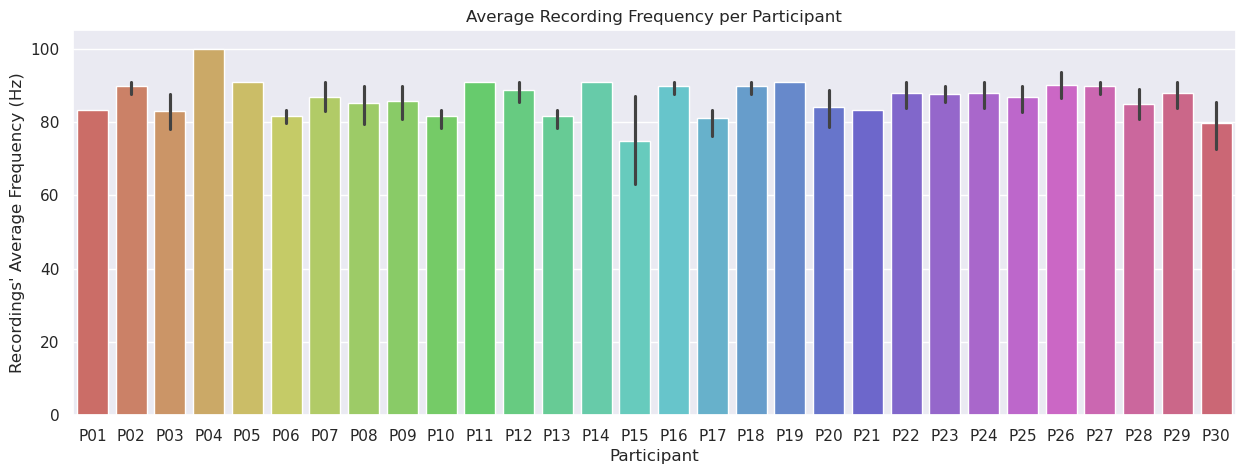

In [20]:
df_frequency.Timestamp = df_frequency.Timestamp.astype("float")

sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(15,5))

sns.set_theme(style="whitegrid")
sns.barplot(data=df_frequency[["Participant", "Timestamp"]], x="Participant", y="Timestamp", hue="Participant", palette=sns.color_palette("hls", len(participants)), ax=ax).set_title("Average Recording Frequency per Participant")

ax.set_ylabel("Recordings' Average Frequency (Hz)")

fig.savefig(PATH_PLOTS_SIGNALS / "recordings_length_participants.png", bbox_inches="tight", dpi=600)
fig.savefig(PATH_PLOTS_SIGNALS / "transparent_recordings_length_participants.png", bbox_inches="tight", dpi=600, transparent=True)
fig.show()

## Sensors' Channel

### Sensors' Channels Data Distribution

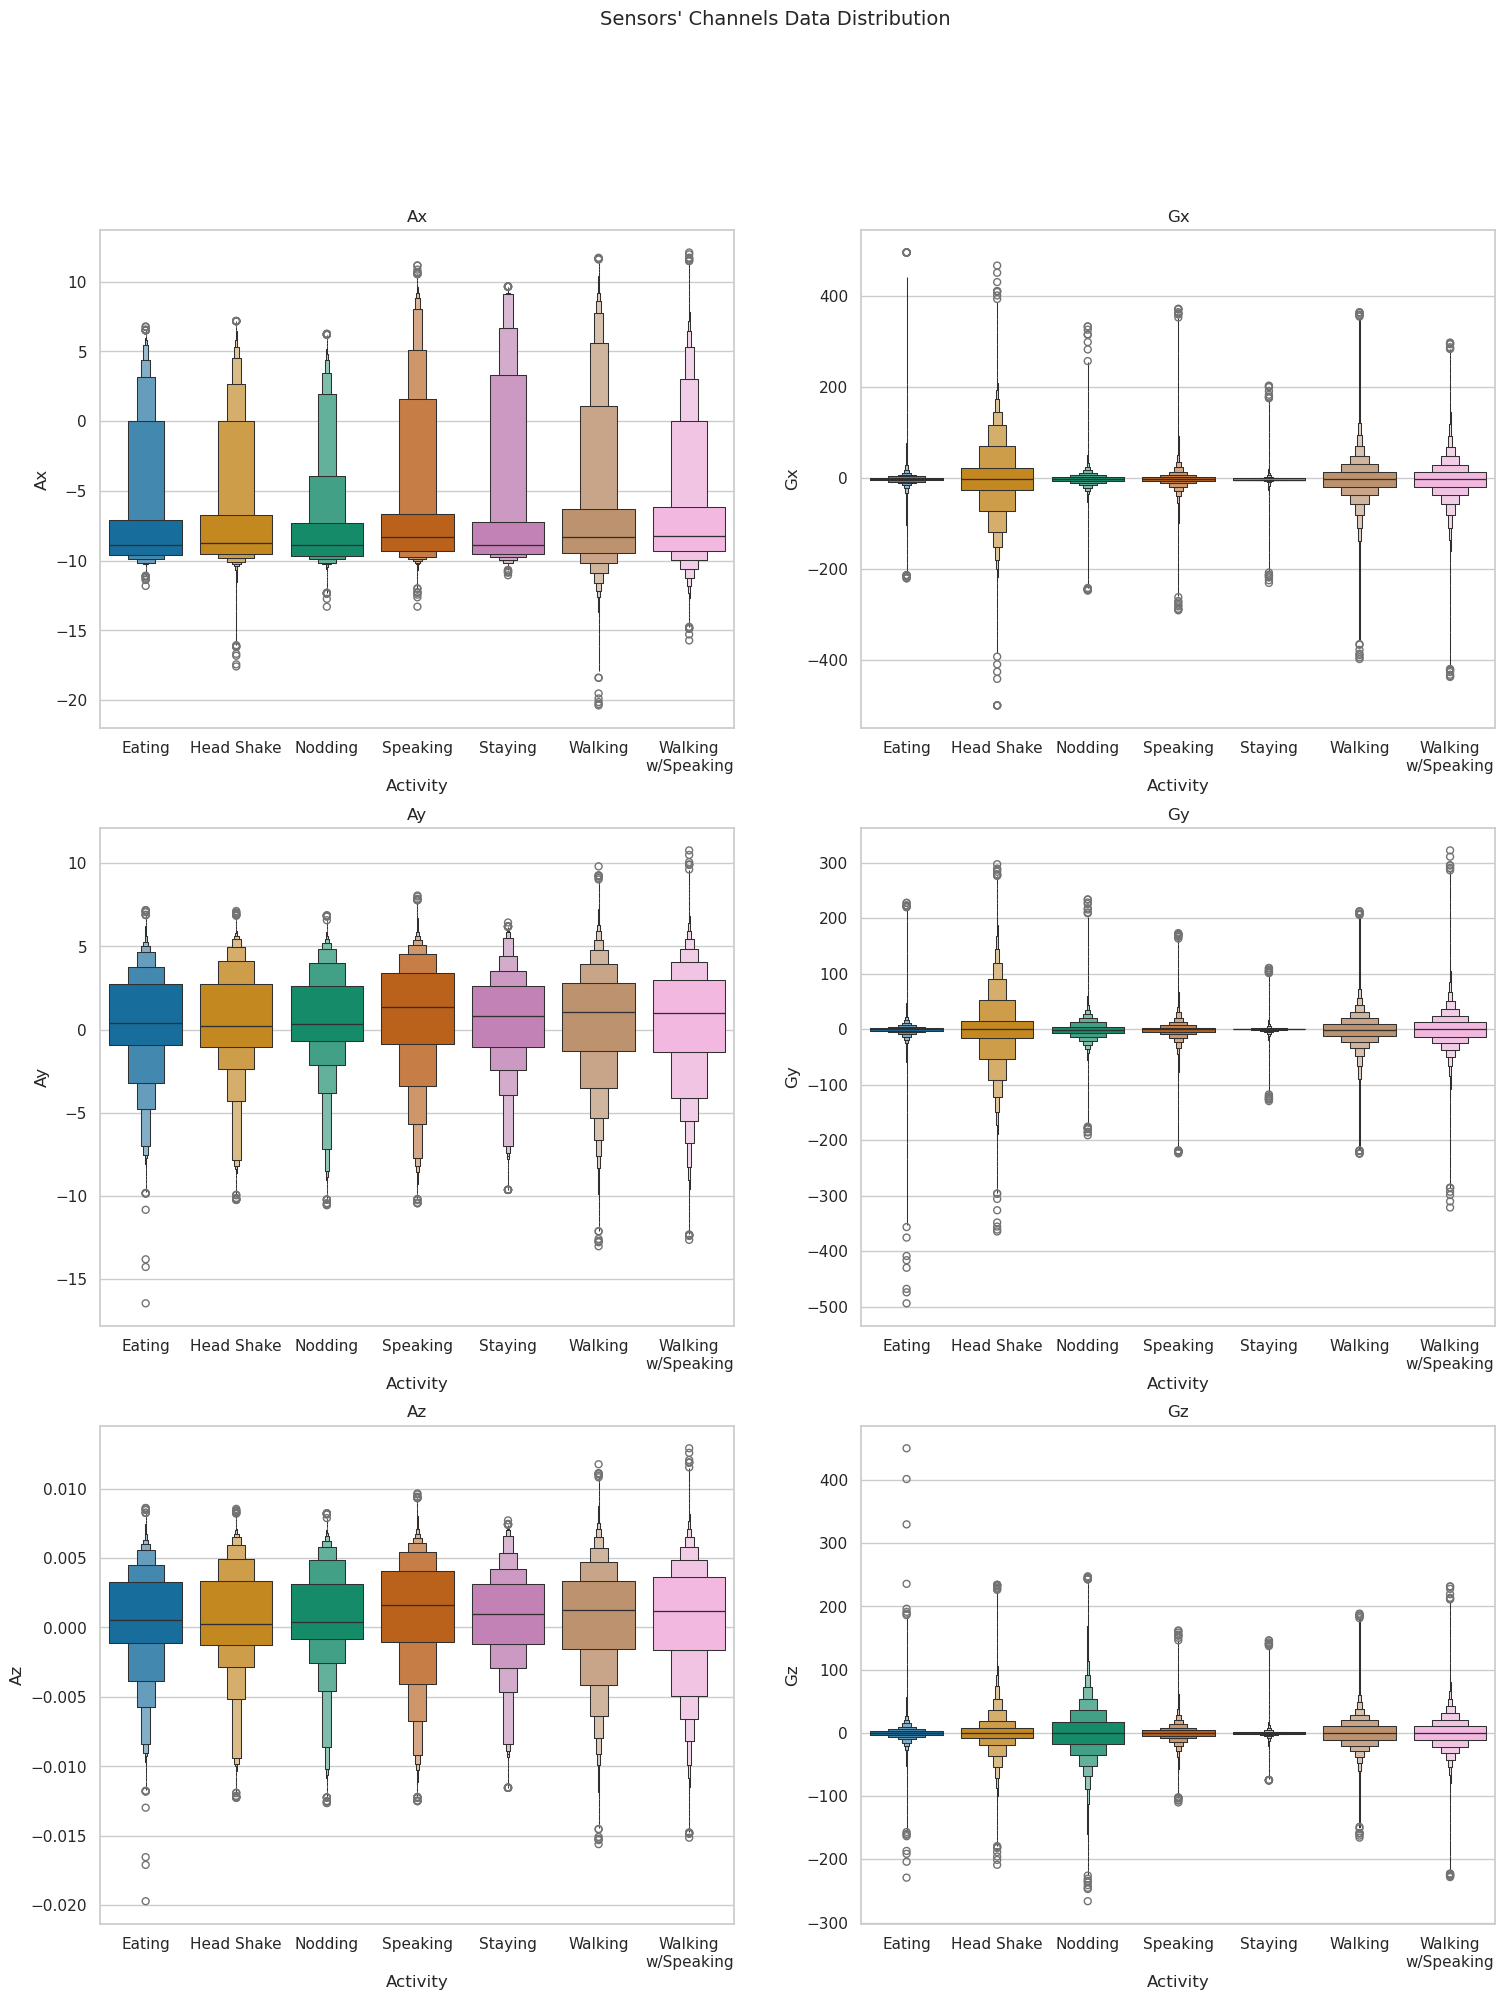

In [21]:
fig, ax = plt.subplots(3, 2, figsize=(18,22))

for idx,sensor in enumerate(SENSORS):
    i = int(np.floor(idx / 3))
    j = idx % 3

    ax[j][i].set_title(sensor)
    sns.boxenplot(data=df_total[[sensor, 'Activity']], x='Activity', hue="Activity", palette=sns.color_palette("colorblind", len(ACTIVITIES)), y=sensor, ax=ax[j][i])

fig.suptitle("Sensors' Channels Data Distribution", fontsize=14)
fig.savefig(PATH_PLOTS_SIGNALS / "distr_sensors_activity.png", bbox_inches="tight", dpi=600)
fig.savefig(PATH_PLOTS_SIGNALS / "transparent_distr_sensors_activity.png", bbox_inches="tight", dpi=600, transparent=True)
fig.show()

### Sensors' Channels Mean Values

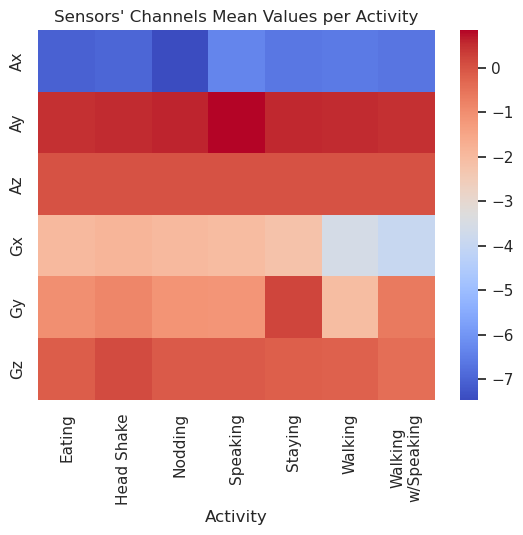

In [22]:
ax = sns.heatmap(data=df_total.groupby(["Activity"])[SENSORS].mean().transpose(), cmap=sns.color_palette("coolwarm", as_cmap=True), yticklabels=['Ax','Ay','Az','Gx','Gy','Gz'])
ax.set_title("Sensors' Channels Mean Values per Activity")

fig.savefig(PATH_PLOTS_SIGNALS / "mean_sensors_activity.png", bbox_inches="tight", dpi=600)
fig.savefig(PATH_PLOTS_SIGNALS / "transparent_mean_sensors_activity.png", bbox_inches="tight", dpi=600, transparent=True)

fig.show()

## Participants' Data Distribution per Sensor Channel and Activity 

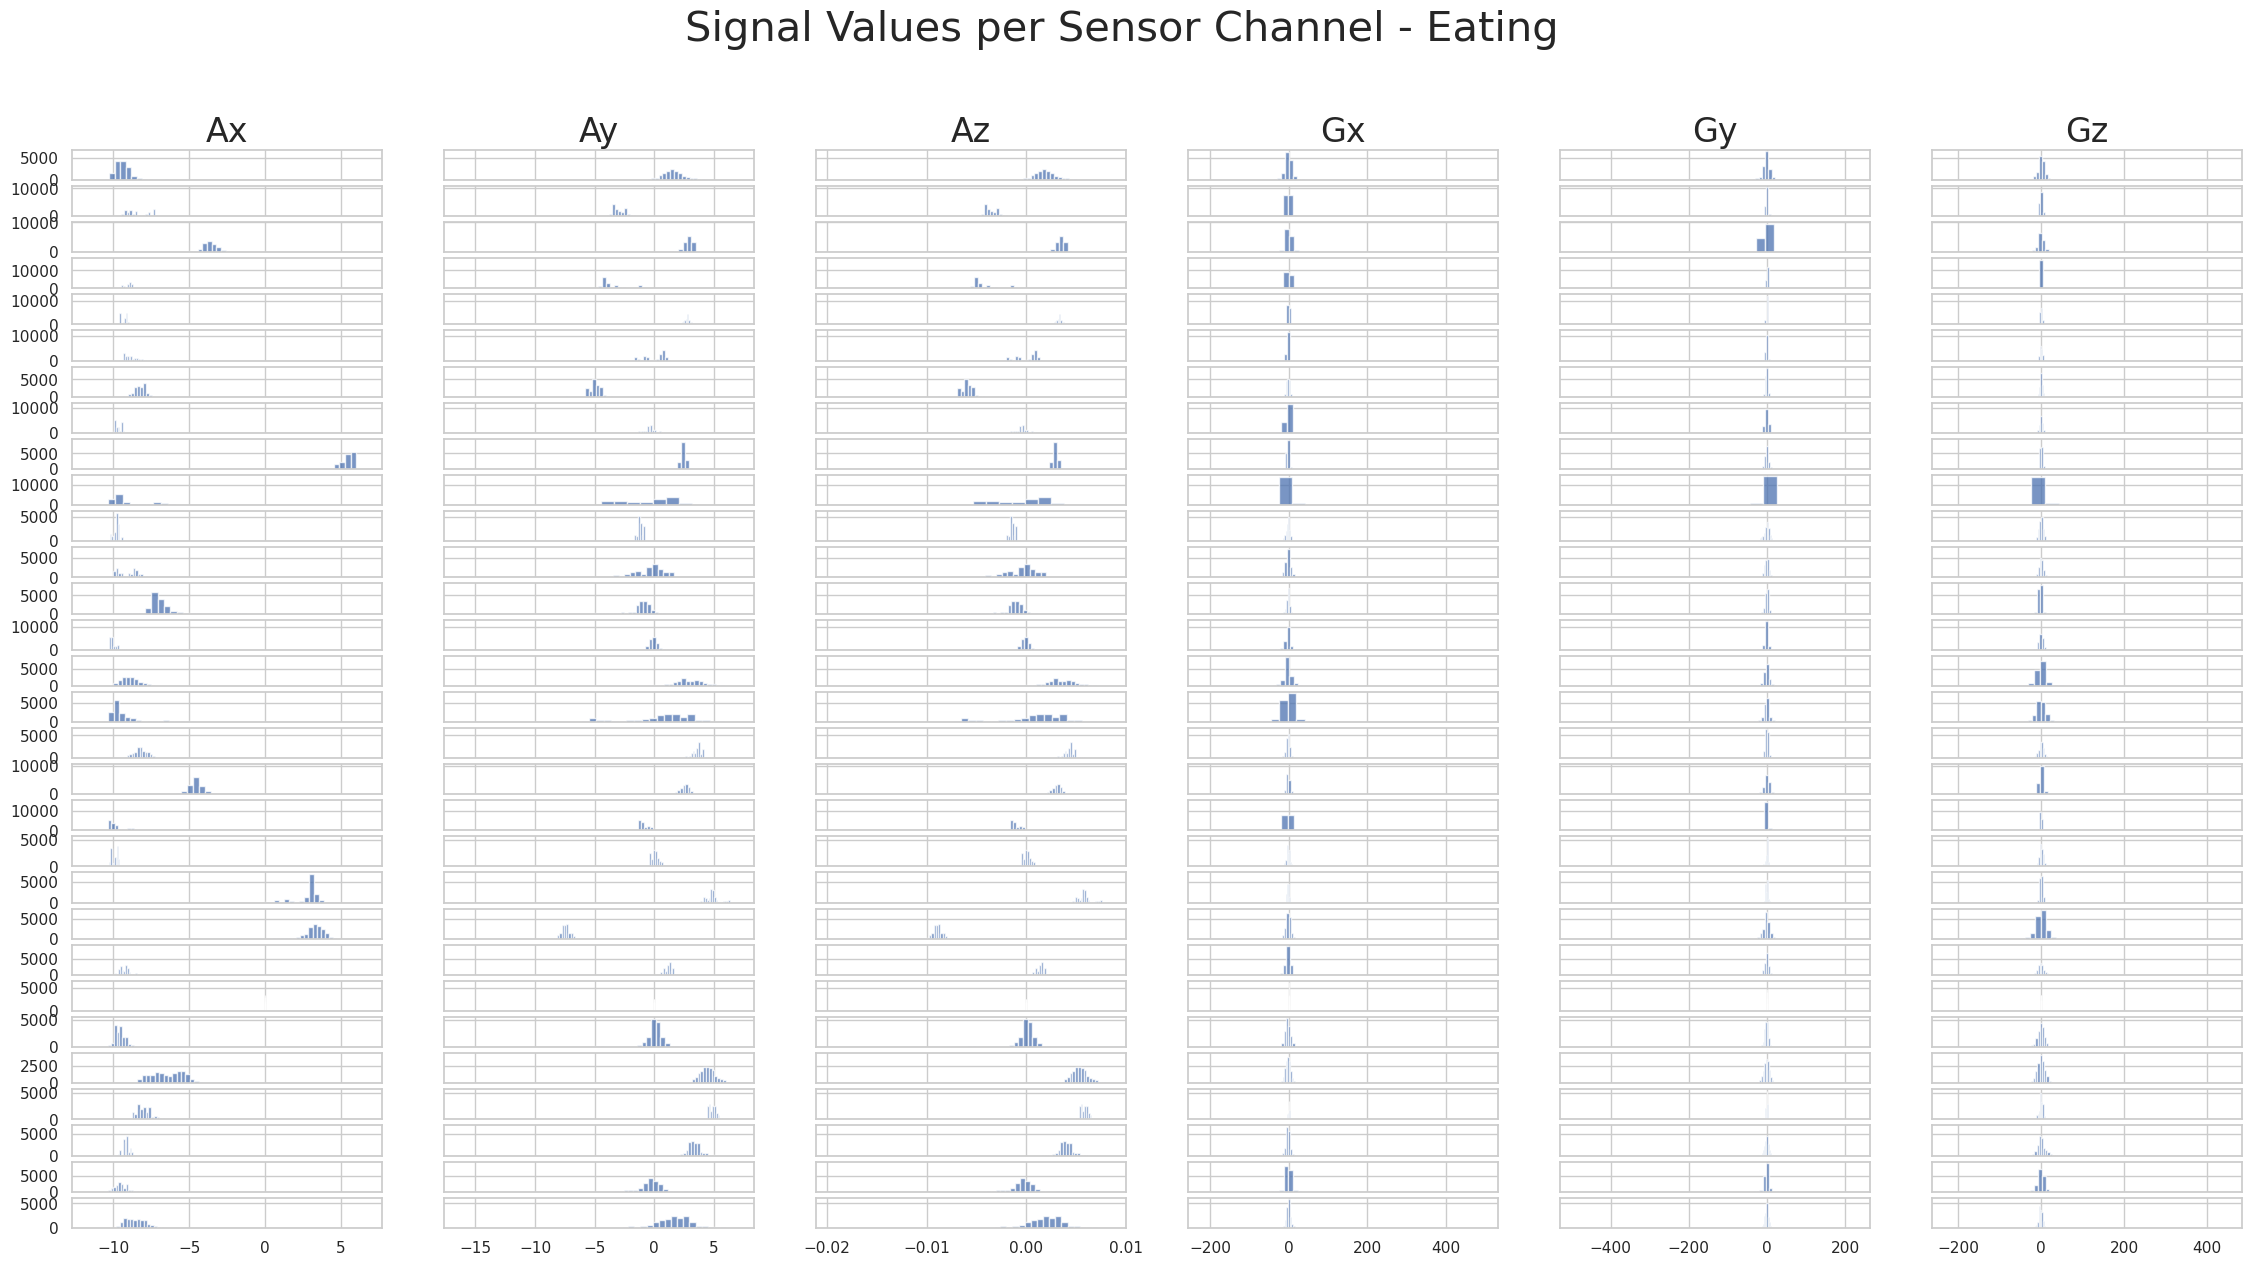

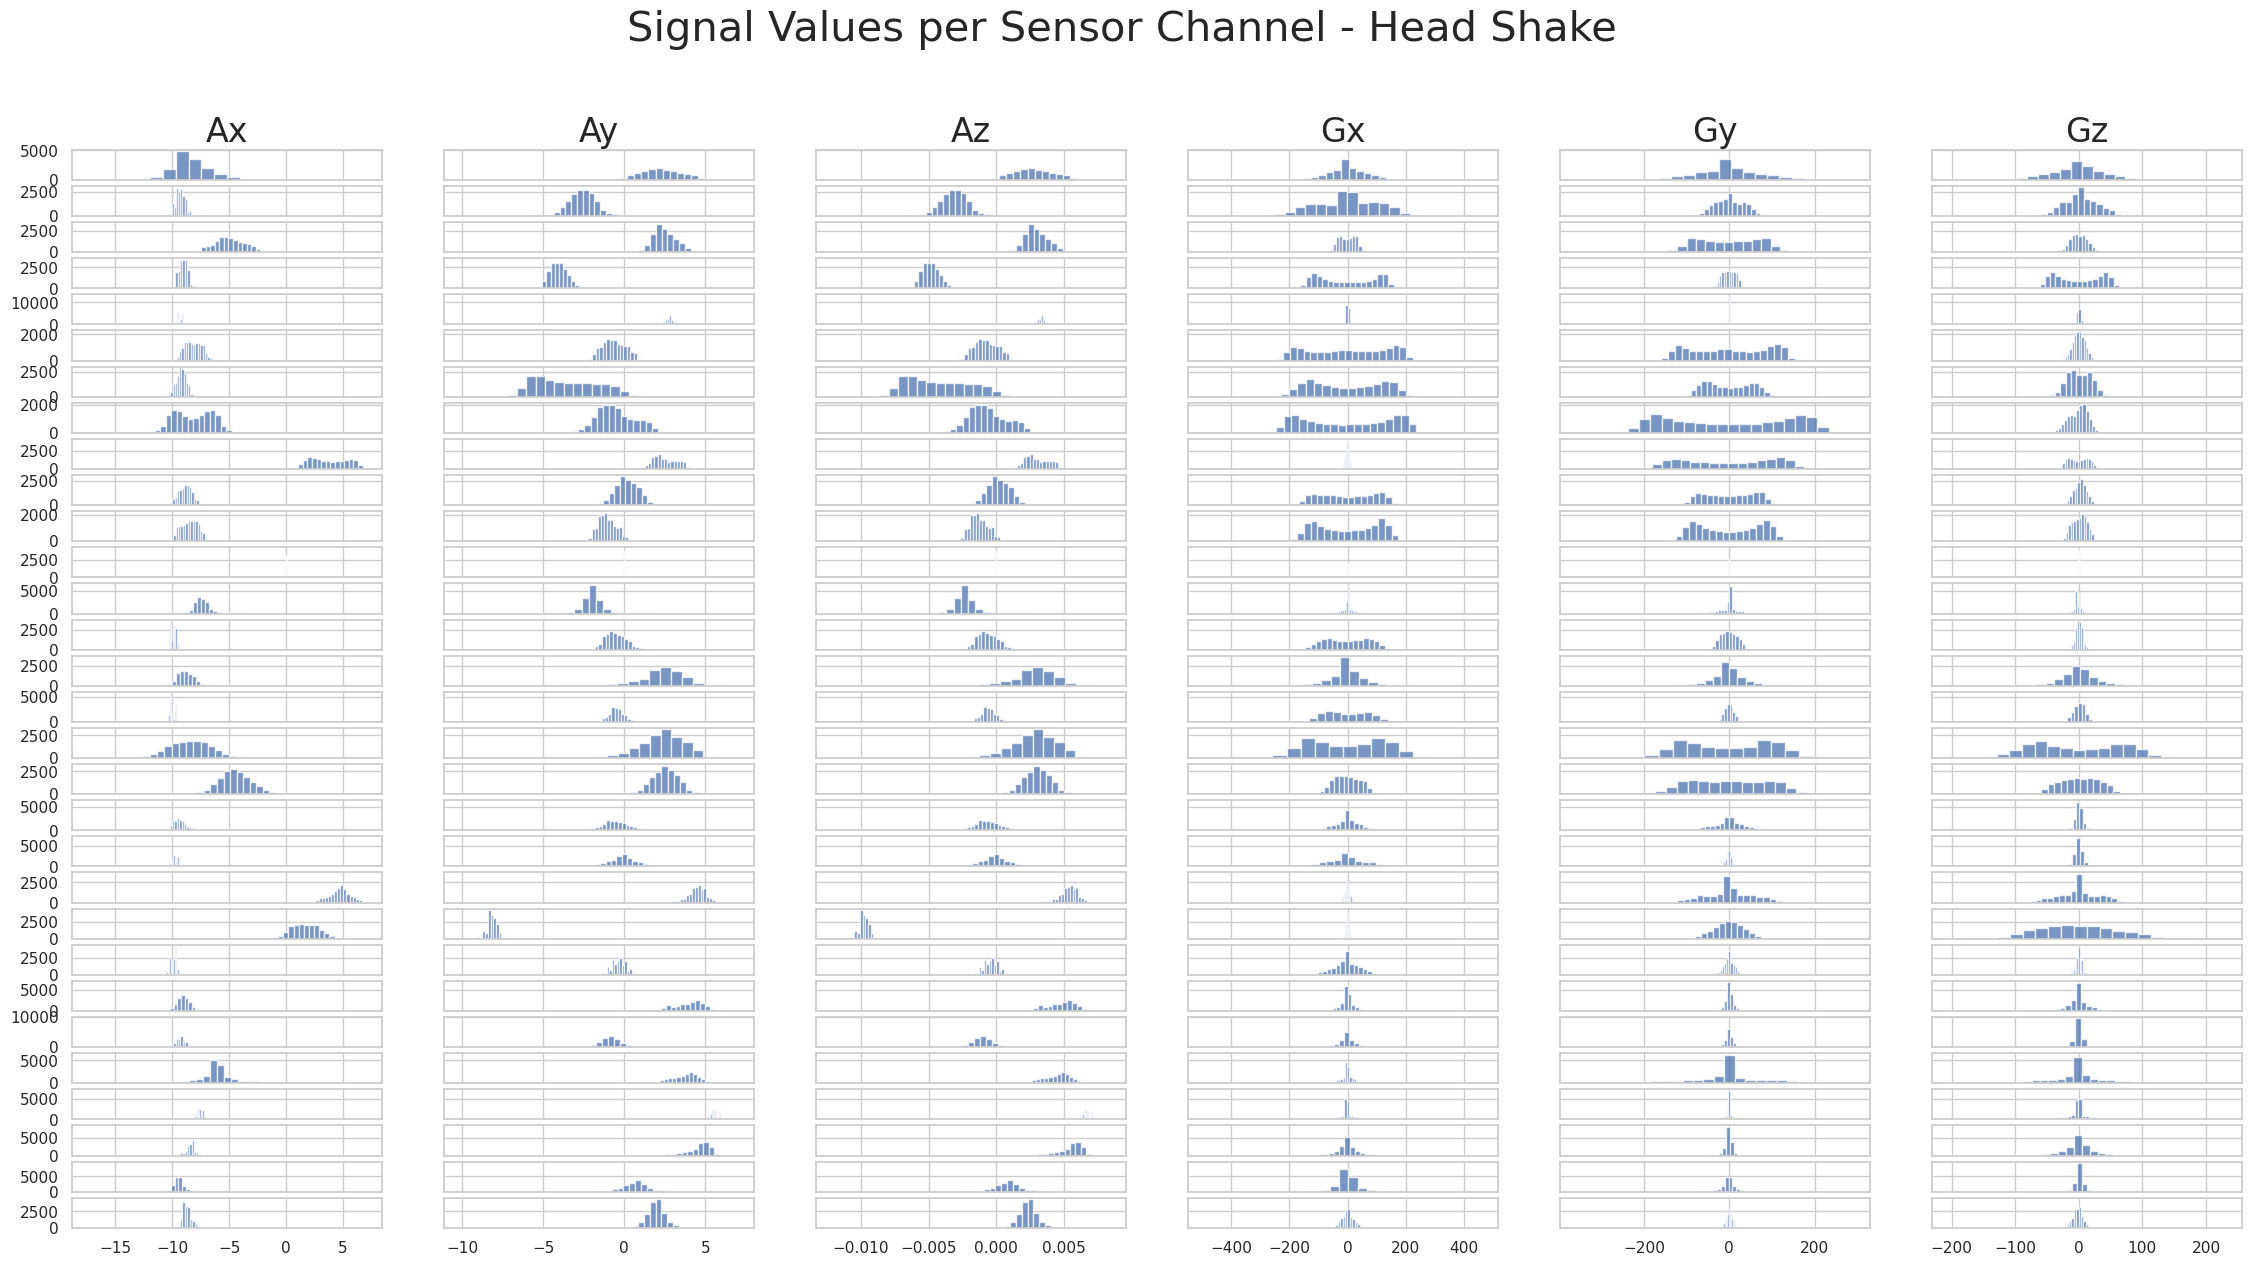

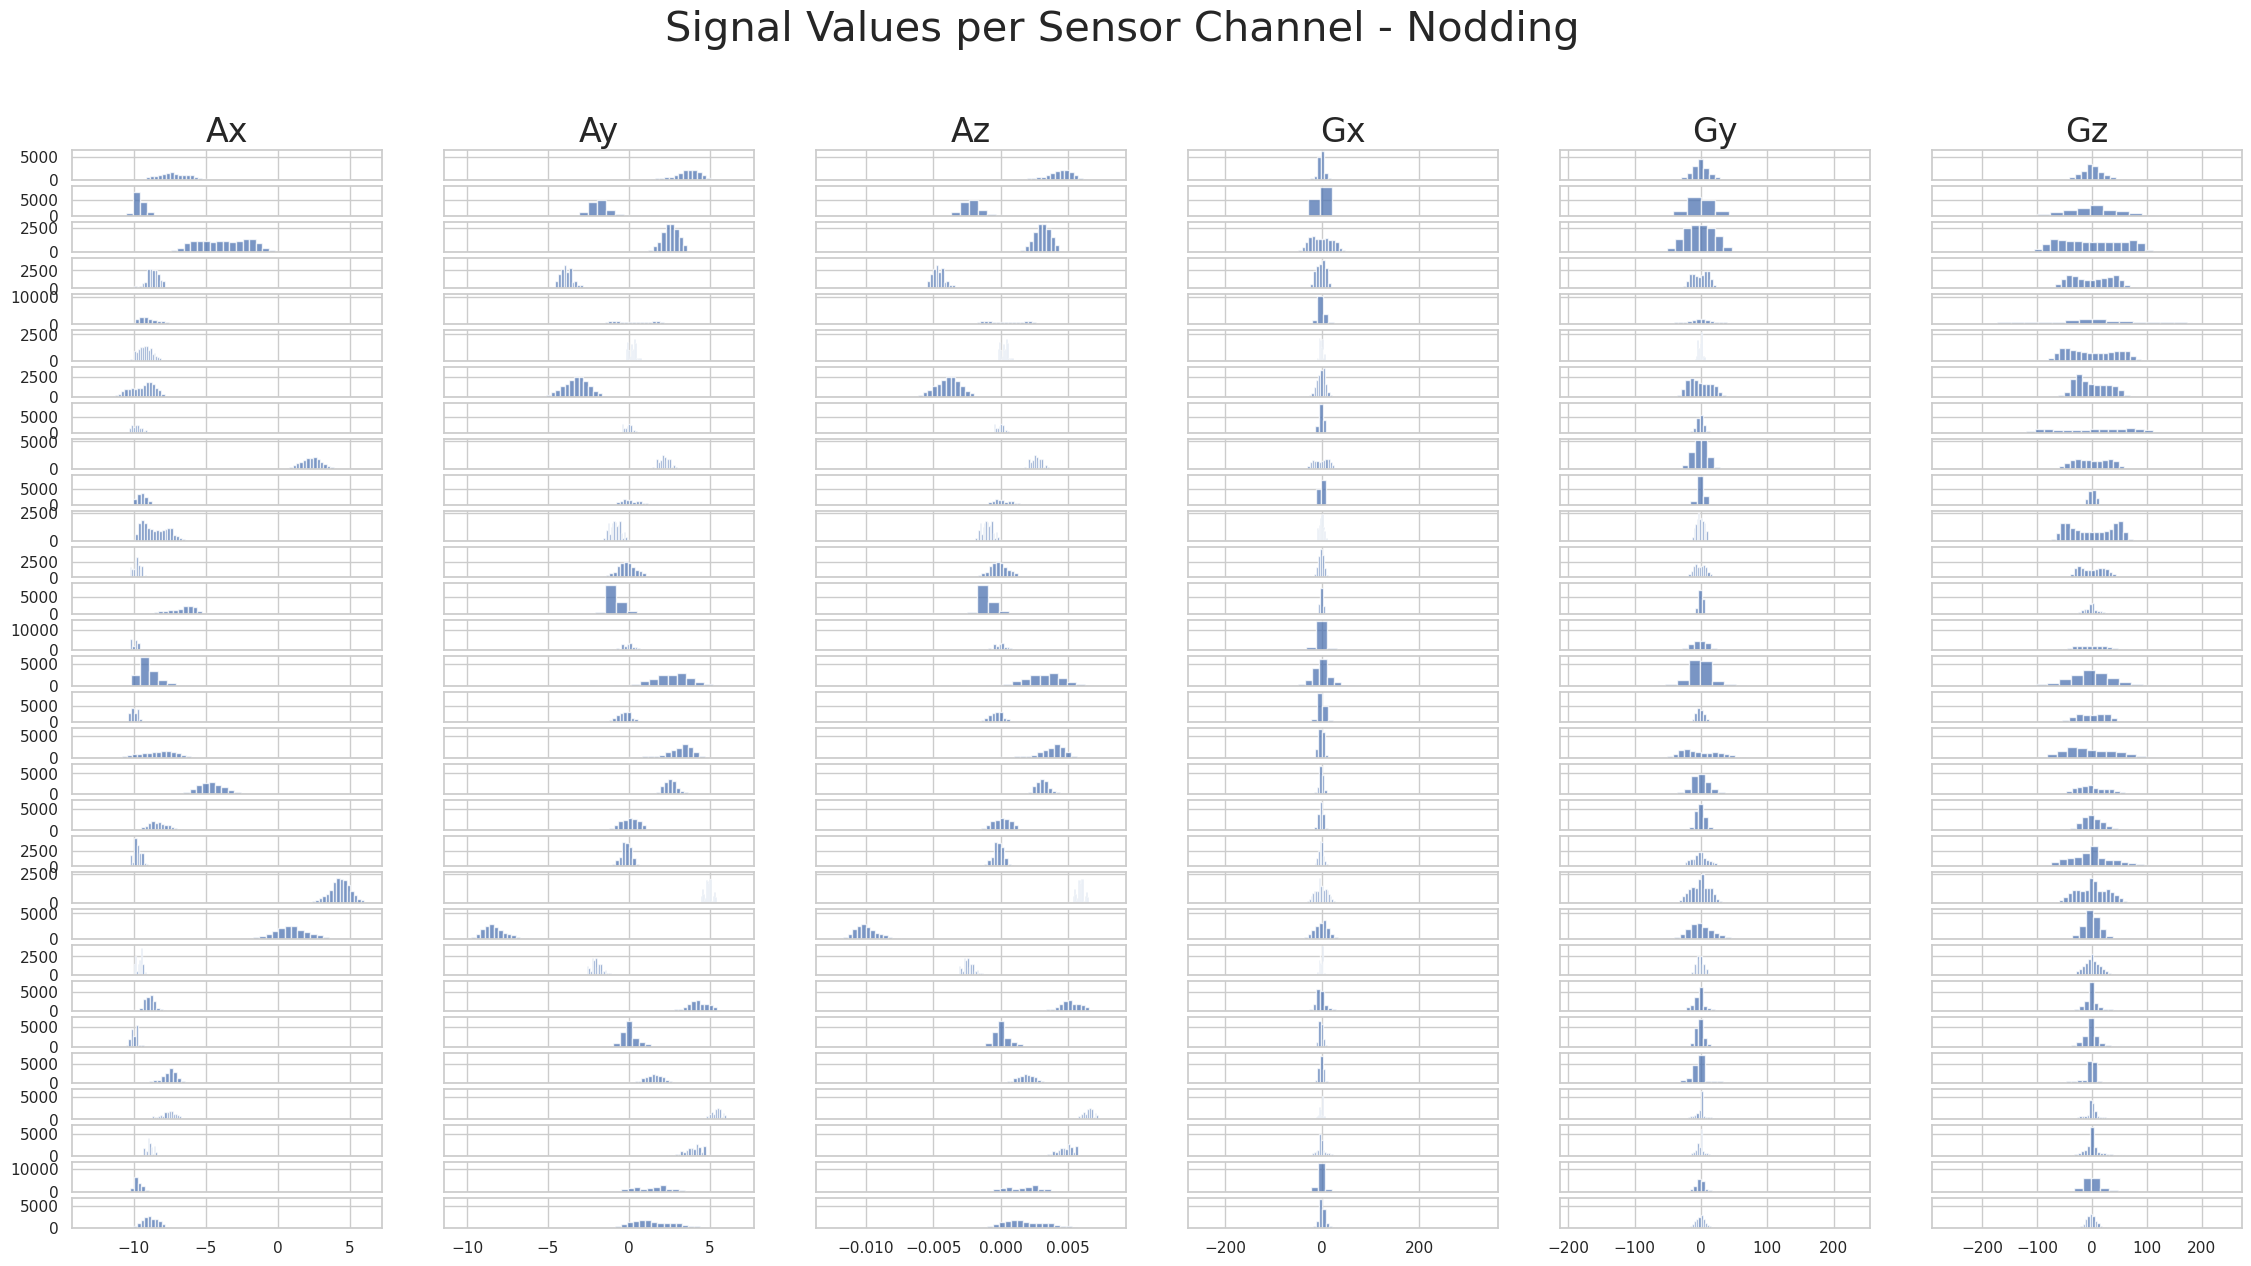

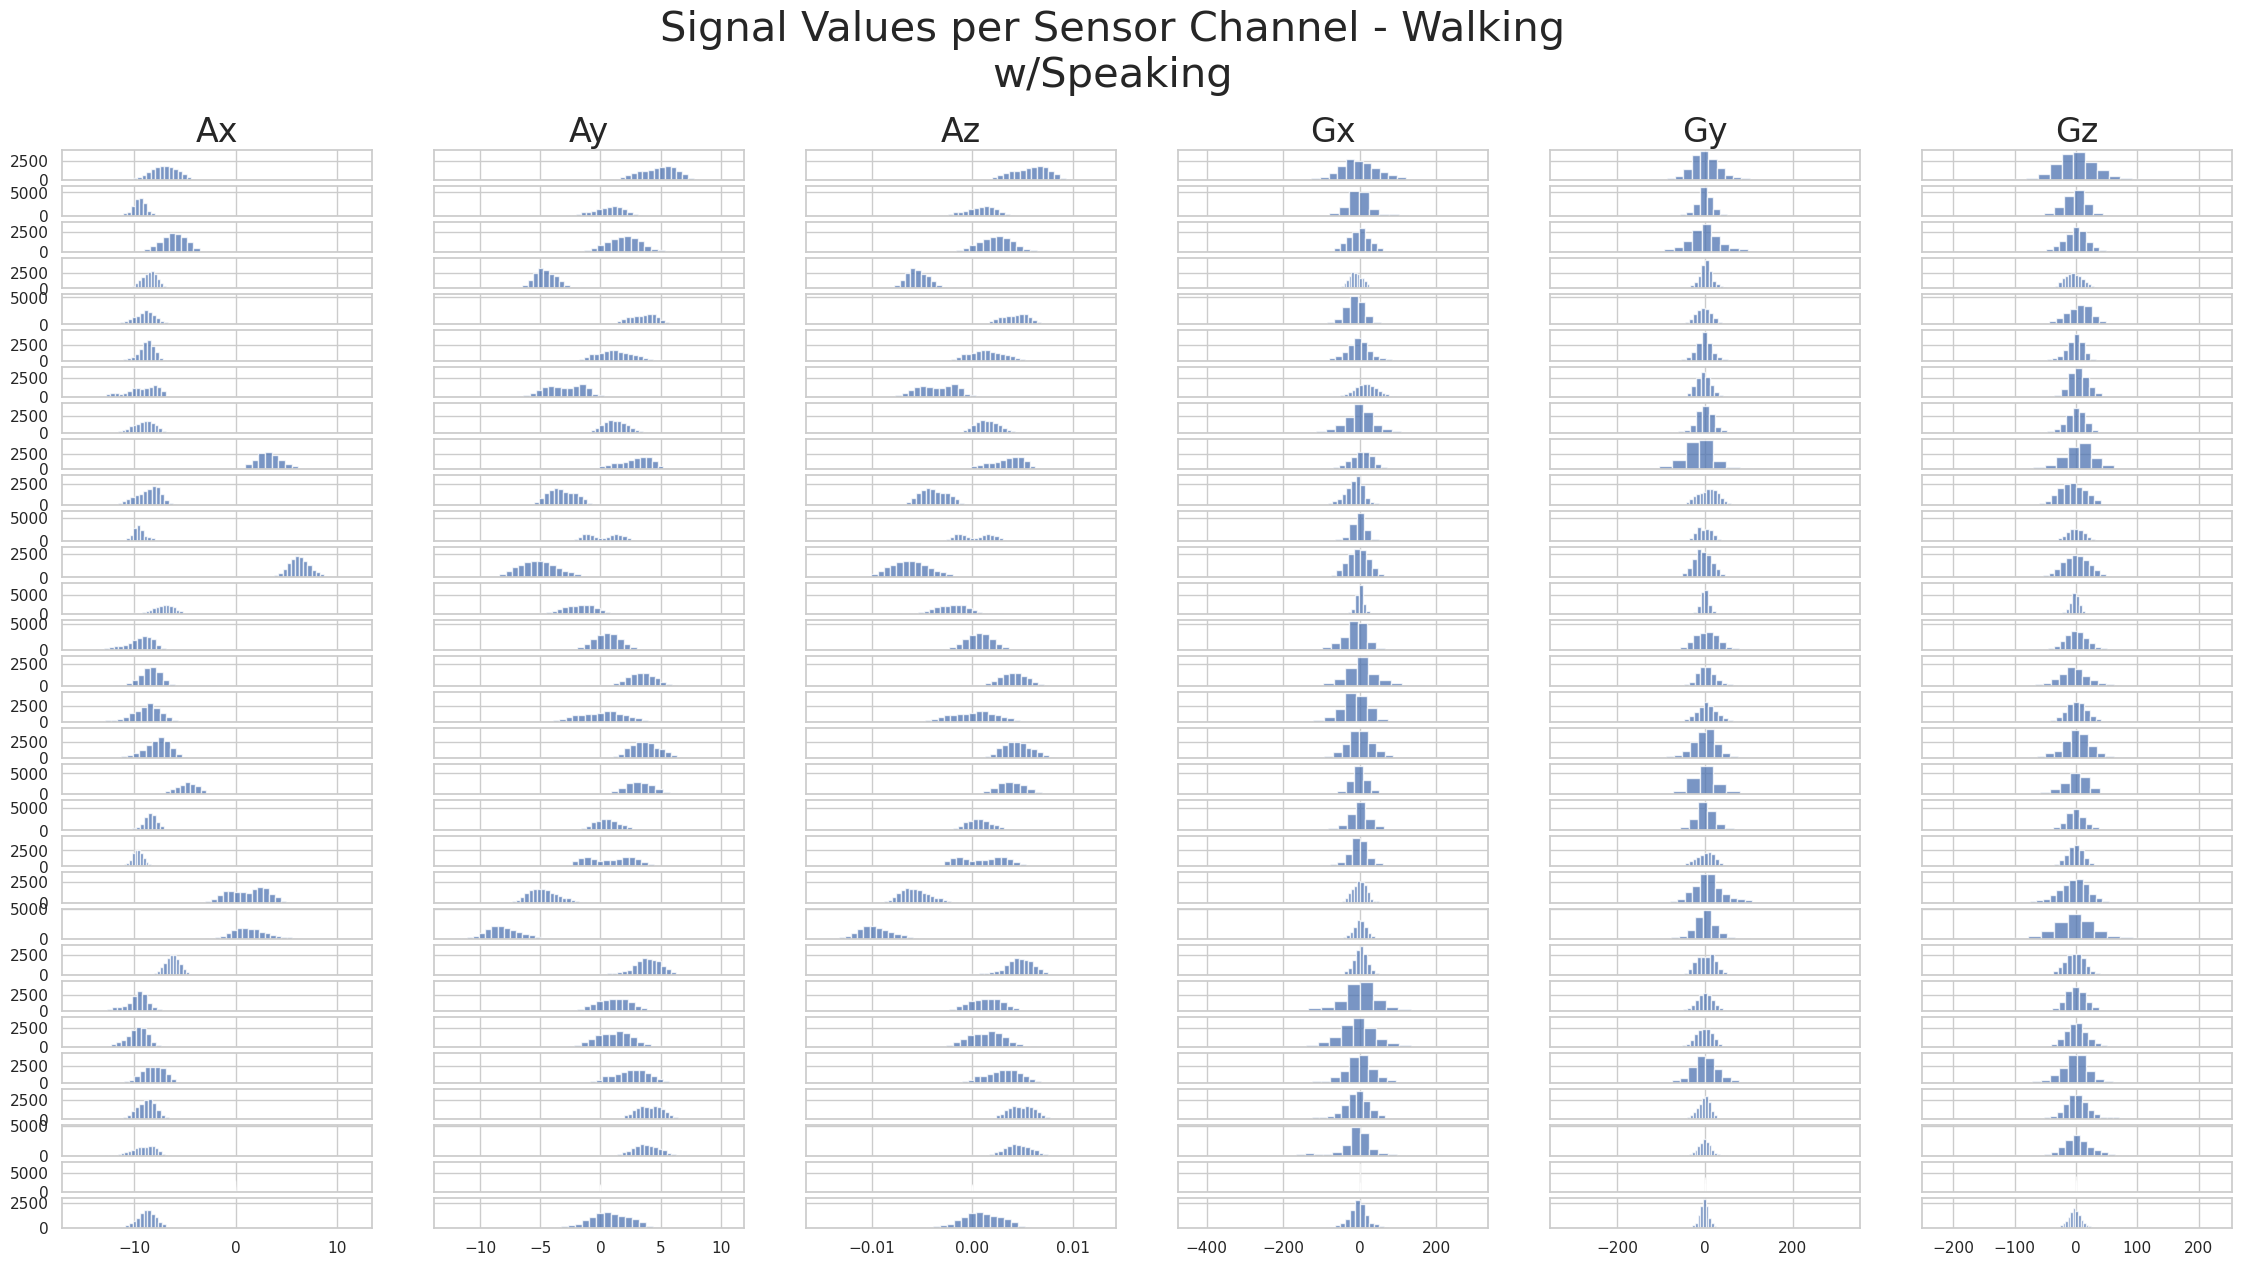

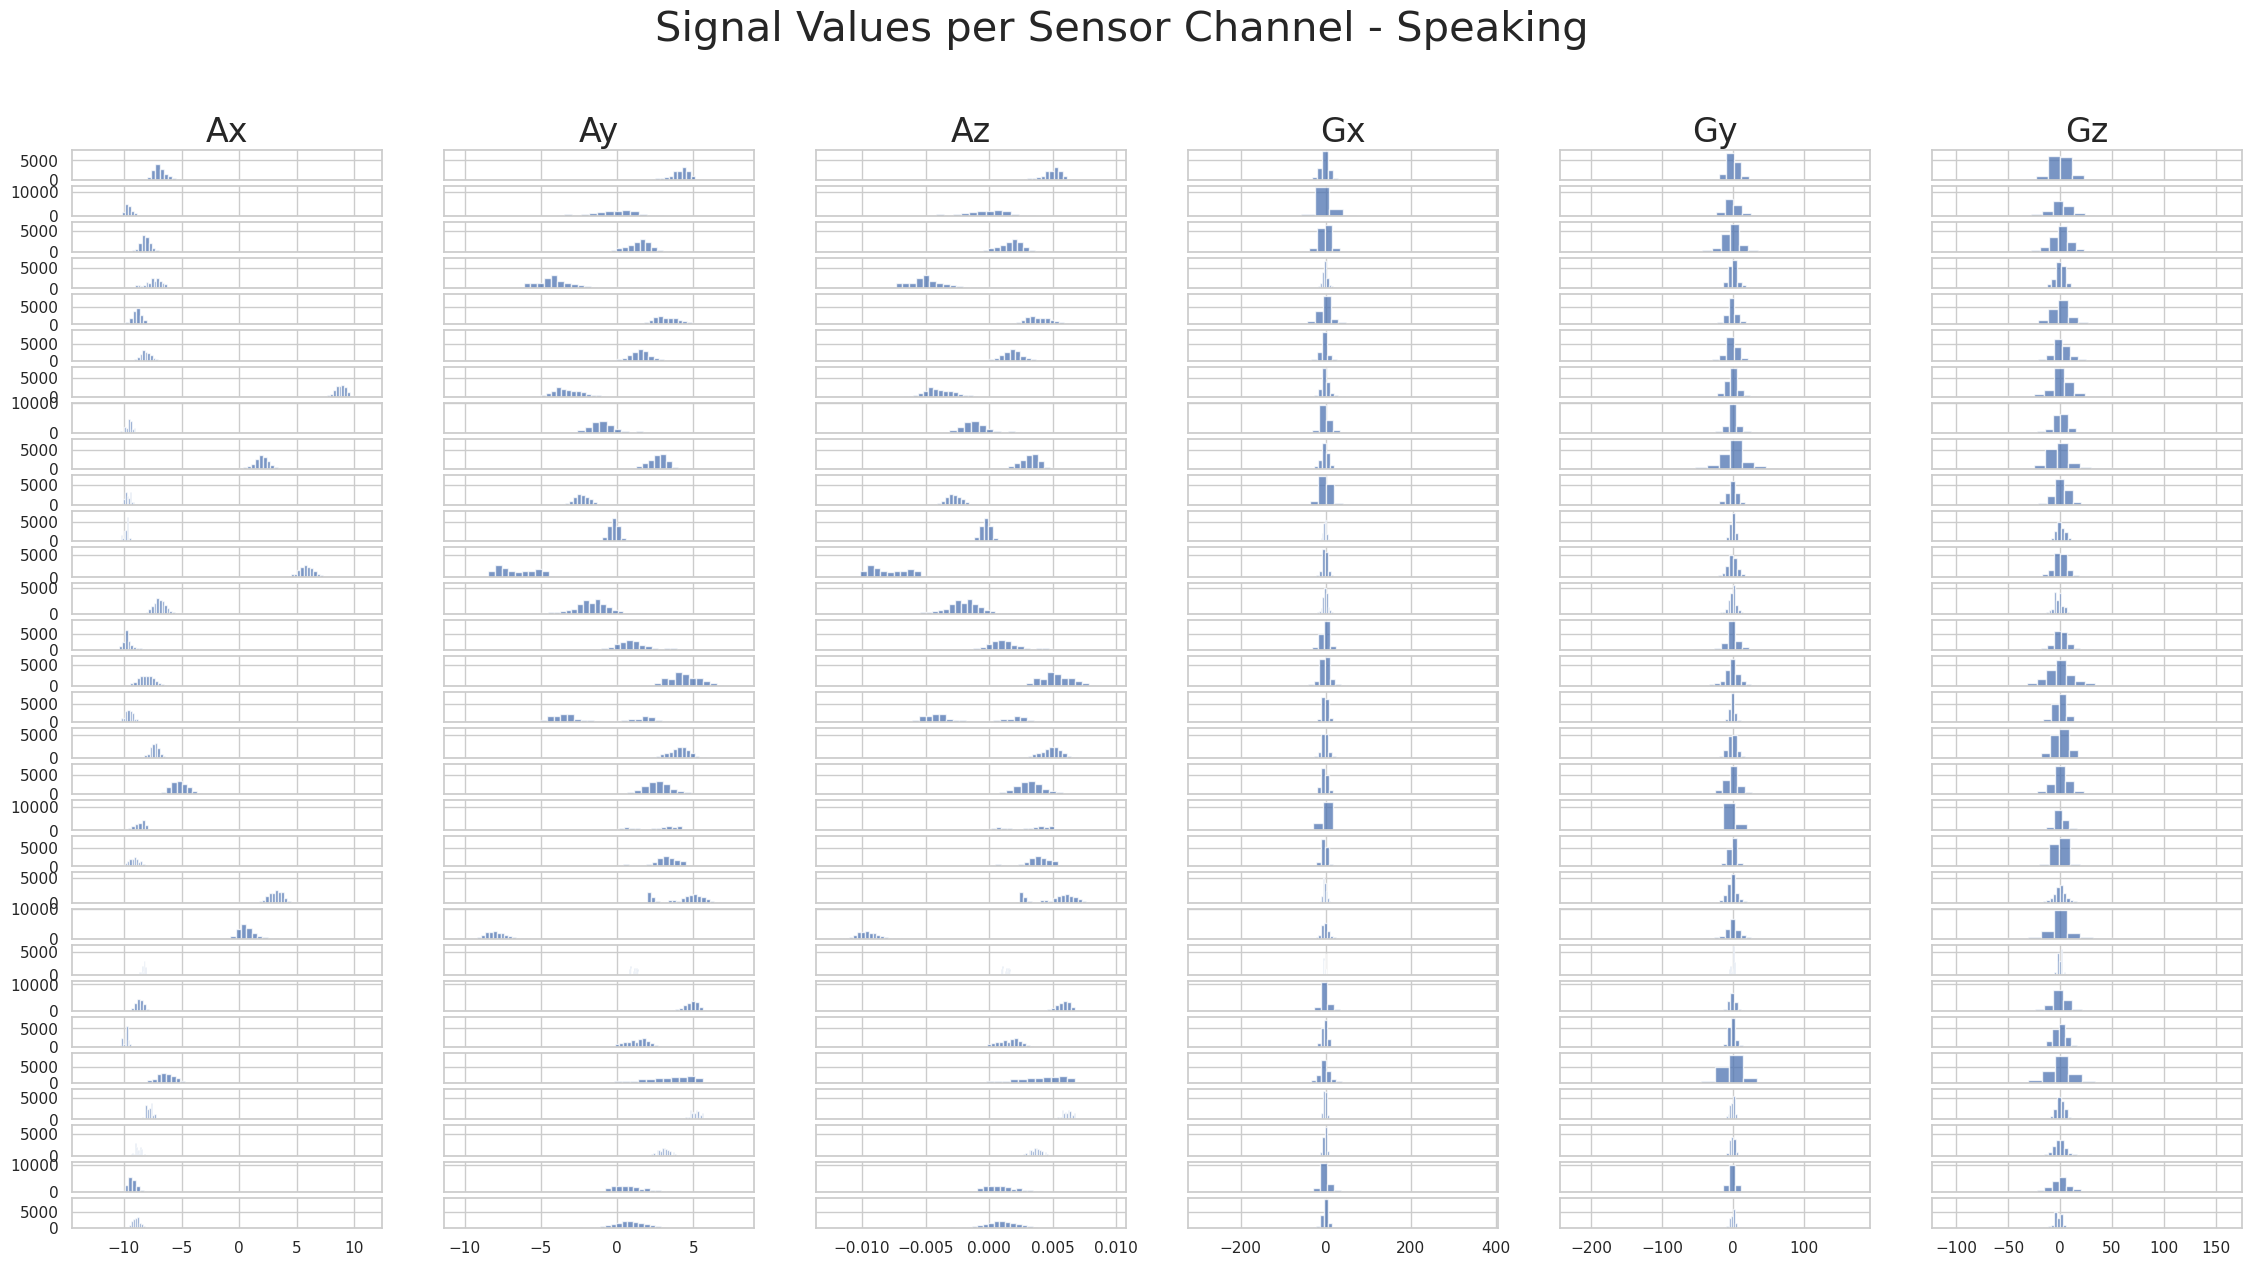

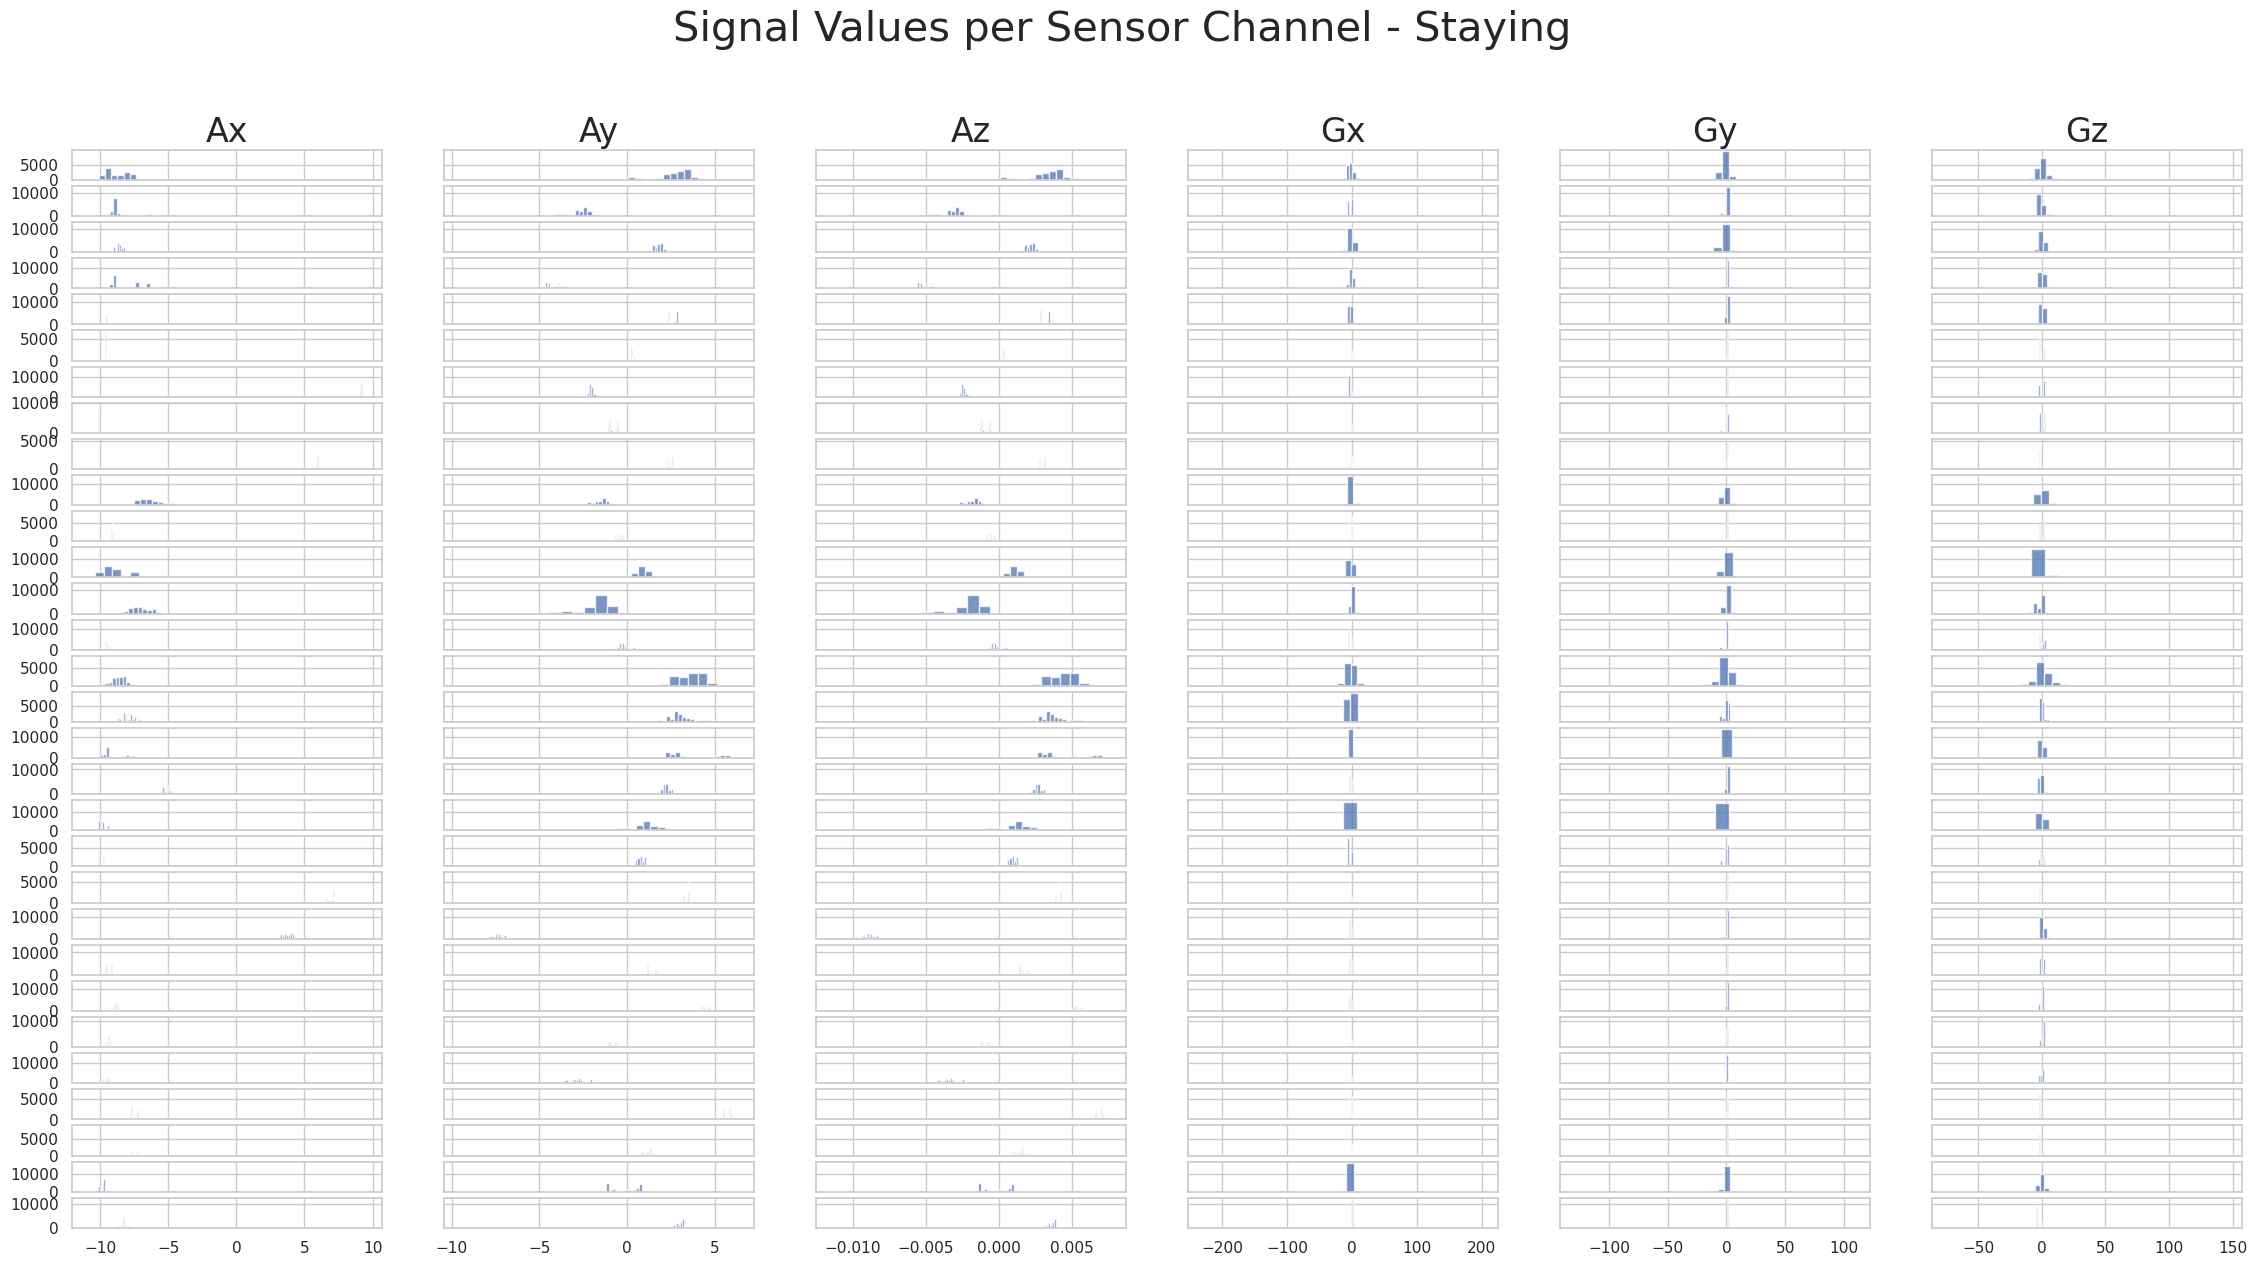

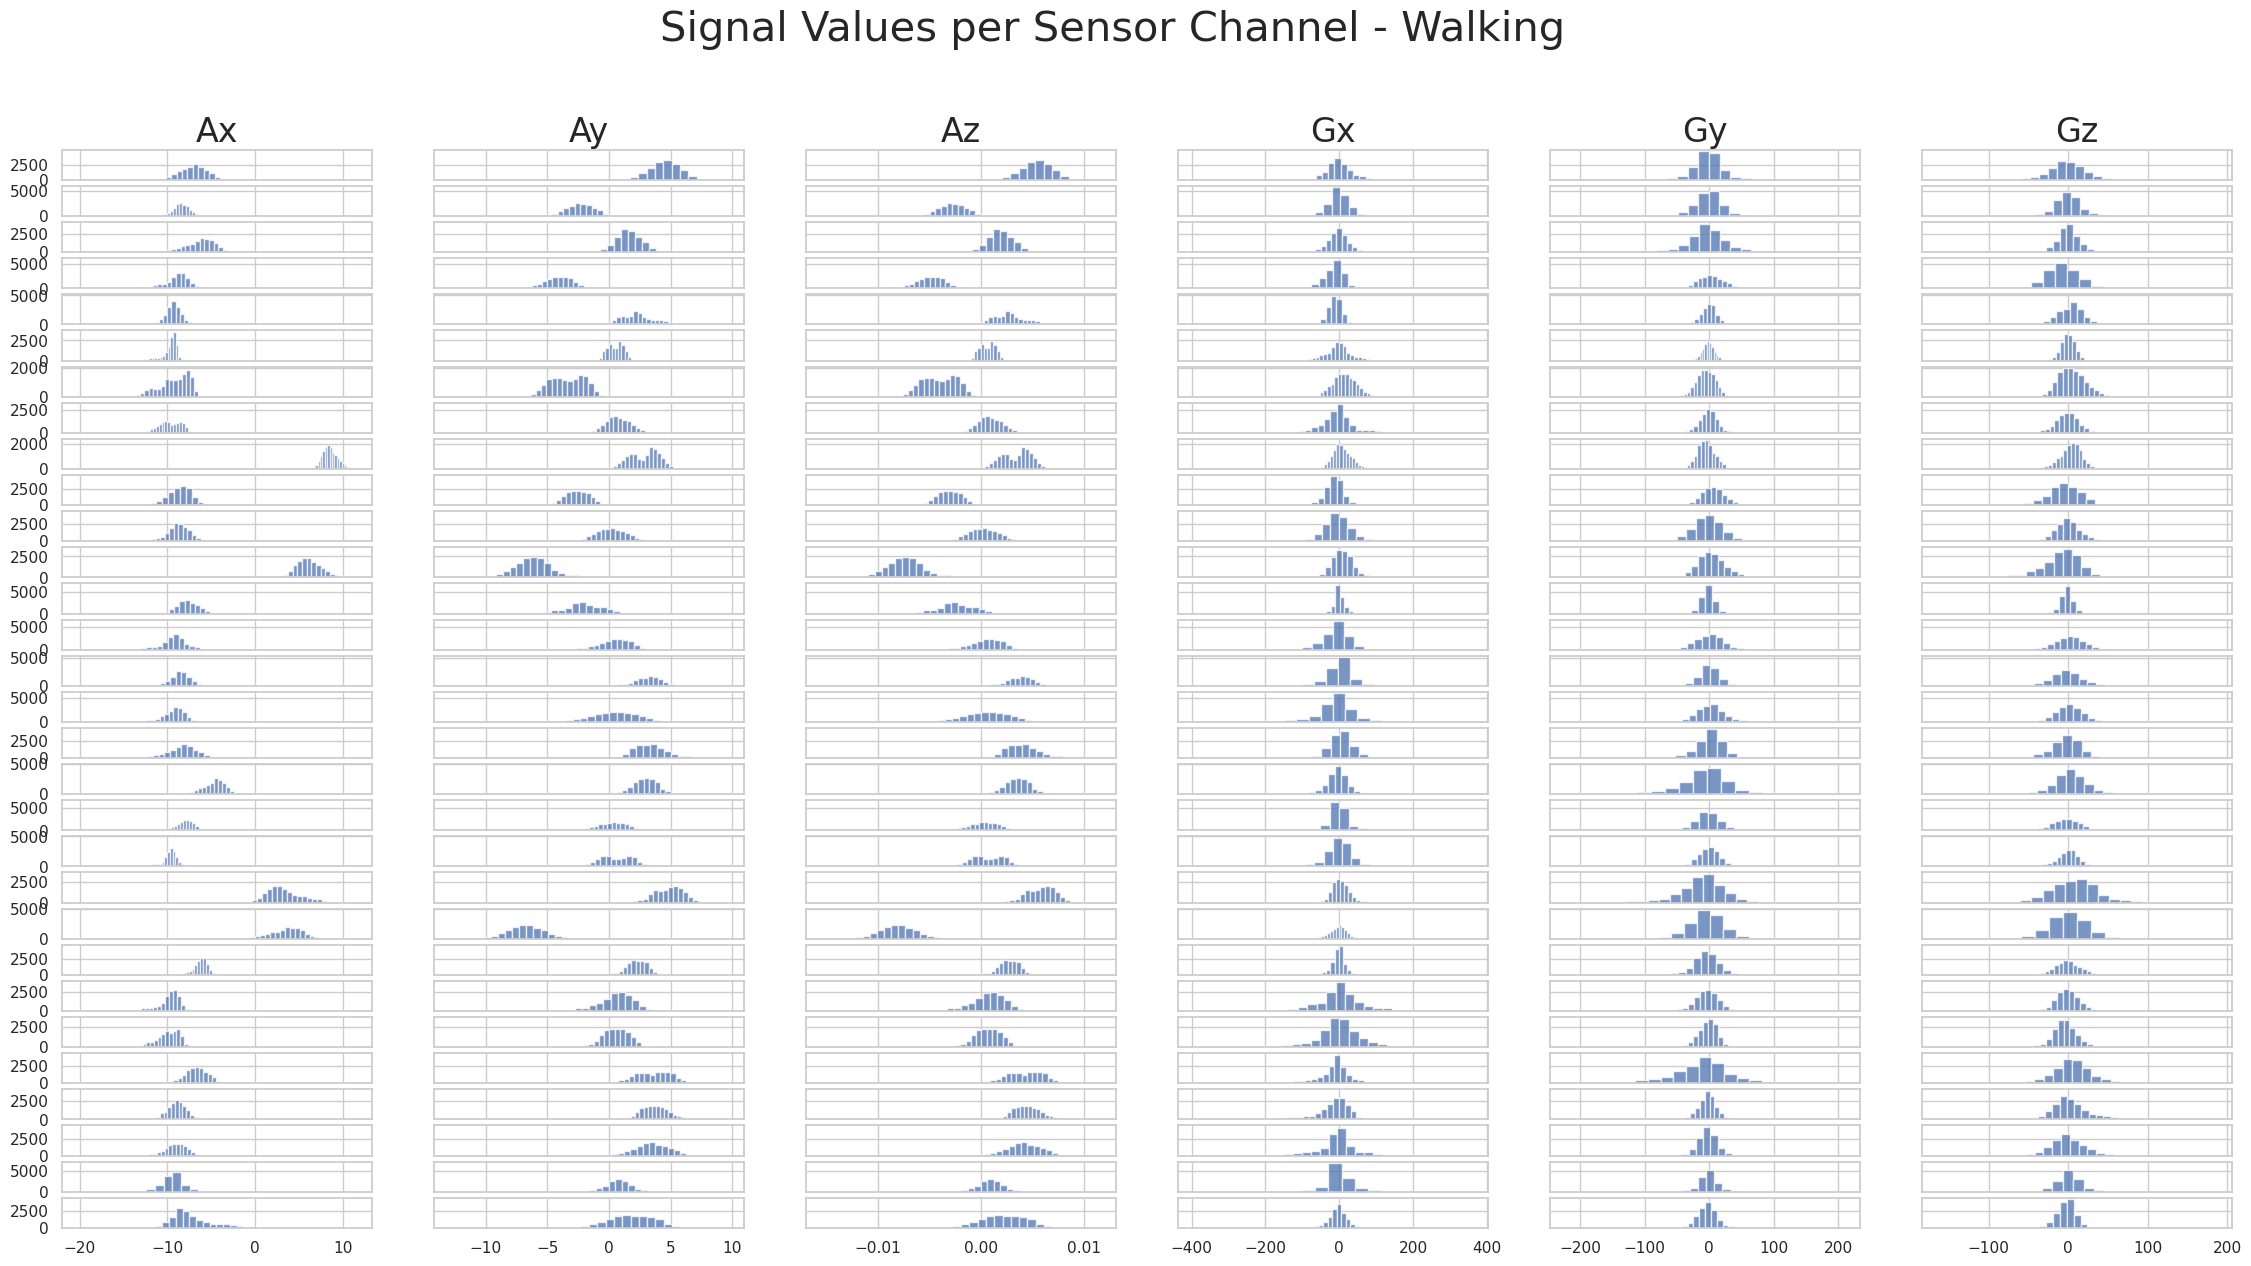

In [23]:
for activity in ACTIVITIES:
    df_activity = df_total[df_total.Activity == activity]

    fig, ax = plt.subplots(len(participants), len(SENSORS), sharex='col', sharey='row', figsize=(28,14))
    
    for col,s in enumerate(SENSORS):
        ax[0][col].set_title(s, fontsize=24)

        for row,p in enumerate(participants):
            ax[row][col].hist(df_activity[df_activity.Participant == p][s], bins=20, alpha=0.75)
    fig.suptitle("Signal Values per Sensor Channel - %s" % activity, fontsize=30)
    activity = activity.replace("\n", " ").replace("w/", "w_")
    fig.savefig(PATH_PLOTS_SIGNALS / ("data_distr_per_channel_%s.png" %(activity)), bbox_inches="tight", dpi=600)
    fig.savefig(PATH_PLOTS_SIGNALS / ("transparent_data_distr_per_channel_%s.png" %(activity)), bbox_inches="tight", dpi=600, transparent=True)

    fig.show()